In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# CSV functions
def csv_to_dict(file):
    """
    read CSV file and create dict with key for each head containing a list of column entries for respective head
    
    :param file: path to CSV file to read
    :return: created dictionary
    """
    d = {}
    with open(file) as fin:
        reader = csv.reader(fin)
        headers = next(reader, None)
        for h in headers:
            d[h] = []
        for row in reader:
            for h, entry in zip(headers,row):
                d[h].append(entry)
    return d


def print_csv_dict(d):
    """
    print CSV dictionary in formatted way
    
    :param d: dict of CSV file to print
    :return:
    """
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(d)

In [3]:
# IMU data dict functions
def extract_acc(d):
    """
    extract acceleration vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: acc_x, acc_y, acc_z (numpy arrays)
    """
    acc_x = np.array(d['arx'], dtype='float32')
    acc_y = np.array(d['ary'], dtype='float32')
    acc_z = np.array(d['arz'], dtype='float32')
    return acc_x, acc_y, acc_z


def extract_corr_acc(d):
    """
    extract corrected acceleration vectors for IMU data run dict (subtracted gravity average)
    
    :param d: dict of CSV file of IMU data run
    :return: acc_cx, acc_cy, acc_cz (numpy arrays)
    """
    acc_cx = np.array(d['acx'], dtype='float32')
    acc_cy = np.array(d['acy'], dtype='float32')
    acc_cz = np.array(d['acz'], dtype='float32')
    return acc_cx, acc_cy, acc_cz

def extract_vel(d):
    """
    extract velocity vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: vel_x, vel_y, vel_z (numpy arrays)
    """
    vel_x = np.array(d['vx'], dtype='float32')
    vel_y = np.array(d['vy'], dtype='float32')
    vel_z = np.array(d['vz'], dtype='float32')
    return vel_x, vel_y, vel_z

def extract_pos(d):
    """
    extract position vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: pos_x, pos_y, pos_z (numpy arrays)
    """
    pos_x = np.array(d['sx'], dtype='float32')
    pos_y = np.array(d['sy'], dtype='float32')
    pos_z = np.array(d['sz'], dtype='float32')
    return pos_x, pos_y, pos_z

def extract_time(d):
    """
    extract time vector for IMU data run dict (in seconds)
    
    :param d: dict of CSV file of IMU data run
    :return: time
    """
    timestamps = np.array(d['t'], dtype='float32')
    times = []
    first_time_micro = timestamps[0]
    for t in timestamps:
        time_second = (t - first_time_micro)/1e6
        times.append(time_second)
    return np.array(times, dtype='float32')

In [4]:
# read all IMU files of first data
imu_data_first = []
for run in range(7):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_measurements/data_1/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data_first.append(run_dict)

imu_data_all_up = []
for run in range(5):
    run_name = 'run_ALL_UP' + str(run + 1)
    run_data_file = 'elevator_measurements/data_2/all_up/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data_all_up.append(run_dict)

imu_data_all_down = []
for run in range(5):
    run_name = 'run_ALL_DOWN' + str(run + 1)
    run_data_file = 'elevator_measurements/data_2/all_down/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data_all_down.append(run_dict)
    
imu_data_half_up = []
for run in range(5):
    run_name = 'run_HALF_UP' + str(run + 1)
    run_data_file = 'elevator_measurements/data_2/half_up/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data_half_up.append(run_dict)
    
imu_data_half_down = []
for run in range(5):
    run_name = 'run_HALF_DOWN' + str(run + 1)
    run_data_file = 'elevator_measurements/data_2/half_down/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data_half_down.append(run_dict)

In [5]:
def compute_cov_corr_acc(list_of_run_dicts):
    accs = None
    for run_dict in list_of_run_dicts:
        acc_cx, acc_cy, acc_cz = extract_corr_acc(run_dict)
        acc = np.vstack([acc_cx, acc_cy, acc_cz]).T
        if accs is None:
            accs = acc
        else:
            accs = np.vstack([accs, acc])
        cov = np.cov(accs.T)
    return cov

# compute covariances of each movement
cov_first = compute_cov_corr_acc(imu_data_first)
print(cov_first)

cov_all_up = compute_cov_corr_acc(imu_data_all_up)
print(cov_all_up)

cov_all_down = compute_cov_corr_acc(imu_data_all_down)
print(cov_all_down)

cov_half_up = compute_cov_corr_acc(imu_data_half_up)
print(cov_half_up)

cov_half_down = compute_cov_corr_acc(imu_data_half_down)
print(cov_half_down)

cov_all = compute_cov_corr_acc(imu_data_first + imu_data_all_up + imu_data_all_down + imu_data_half_up + imu_data_half_down)
print(cov_all)

[[ 0.00083095 -0.00013331  0.00081891]
 [-0.00013331  0.00079942 -0.00078094]
 [ 0.00081891 -0.00078094  0.06313705]]
[[ 0.02720964  0.00641367  0.00167437]
 [ 0.00641367  0.02108232 -0.00437993]
 [ 0.00167437 -0.00437993  0.12825337]]
[[ 0.00256383 -0.00080332  0.00475259]
 [-0.00080332  0.00247107 -0.00411643]
 [ 0.00475259 -0.00411643  0.10146056]]
[[ 0.00139538 -0.00018453  0.00150856]
 [-0.00018453  0.00166572 -0.00355522]
 [ 0.00150856 -0.00355522  0.1267187 ]]
[[ 0.00182364 -0.00037314  0.00228427]
 [-0.00037314  0.00178844 -0.00467426]
 [ 0.00228427 -0.00467426  0.16810946]]
[[ 0.00860808  0.00139632  0.00247775]
 [ 0.00139632  0.00704391 -0.00370201]
 [ 0.00247775 -0.00370201  0.117881  ]]


In [6]:
def plot_run_data(run_dict, print_max):
    acc_cx, acc_cy, acc_cz = extract_corr_acc(run_dict)
    vel_x, vel_y, vel_z = extract_vel(run_dict)
    pos_x, pos_y, pos_z = extract_pos(run_dict)
    time = extract_time(run_dict)
    print(acc_cx.shape, time.shape)
    
    f, axarr = plt.subplots(3, 2, figsize=(30,30))
    # plot corrected accelerations
    axarr[0, 0].plot(time, acc_cx, label='acc x-axis')
    axarr[0, 0].plot(time, acc_cy, label='acc y-axis')
    axarr[0, 0].set_title('Corrected acceleration x-/ y-axis', fontsize=30)
    axarr[0, 0].set_xlabel('time in seconds', fontsize=25)
    axarr[0, 0].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[0, 0].legend(prop={'size': 20})
    
    axarr[0, 1].plot(time, acc_cz, label='acc z-axis')
    axarr[0, 1].set_title('Corrected acceleration z-axis', fontsize=30)
    axarr[0, 1].set_xlabel('time in seconds', fontsize=25)
    axarr[0, 1].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[0, 1].legend(prop={'size': 20})
    
    # plot velocities
    axarr[1, 0].plot(time, vel_x, label='vel x-axis')
    axarr[1, 0].plot(time, vel_y, label='vel y-axis')
    axarr[1, 0].set_title('Velocities x-/ y-axis', fontsize=30)
    axarr[1, 0].set_xlabel('time in seconds', fontsize=25)
    axarr[1, 0].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[1, 0].legend(prop={'size': 20})
    
    axarr[1, 1].plot(time, vel_z, label='vel z-axis')
    axarr[1, 1].set_title('Velocities z-axis', fontsize=30)
    axarr[1, 1].set_xlabel('time in seconds', fontsize=25)
    axarr[1, 1].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[1, 1].legend(prop={'size': 20})
    
    # plot position
    axarr[2, 0].plot(time, pos_x, label='pos x-axis')
    axarr[2, 0].plot(time, pos_y, label='pos y-axis')
    axarr[2, 0].set_title('Positions x-/ y-axis', fontsize=30)
    axarr[2, 0].set_xlabel('time in seconds', fontsize=25)
    axarr[2, 0].set_ylabel('Position in m', fontsize=25)
    axarr[2, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[2, 0].legend(prop={'size': 20})
    
    axarr[2, 1].plot(time, pos_z, label='pos z-axis')
    axarr[2, 1].set_title('Positions z-axis', fontsize=30)
    axarr[2, 1].set_xlabel('time in seconds', fontsize=25)
    axarr[2, 1].set_ylabel('Position in m', fontsize=25)
    axarr[2, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[2, 1].legend(prop={'size': 20})
    
    if print_max:
        print("Max height: %fm" % pos_z.max())
    else:
        print("Min height: %fm" % pos_z.min())

    plt.show()
    
    avg_acc = np.mean([np.mean([abs(a) for a in acc_cx]), np.mean([abs(a) for a in acc_cy])])
    avg_vel = (abs(vel_x[-1]) + abs(vel_y[-1]))/2
    avg_pos = (abs(pos_x[-1]) + abs(pos_y[-1]))/2
    
    return avg_acc, avg_vel, avg_pos

Plots 7 runs all up (first run)
Run 1
(40000,) (40000,)
Max height: 41.539200m


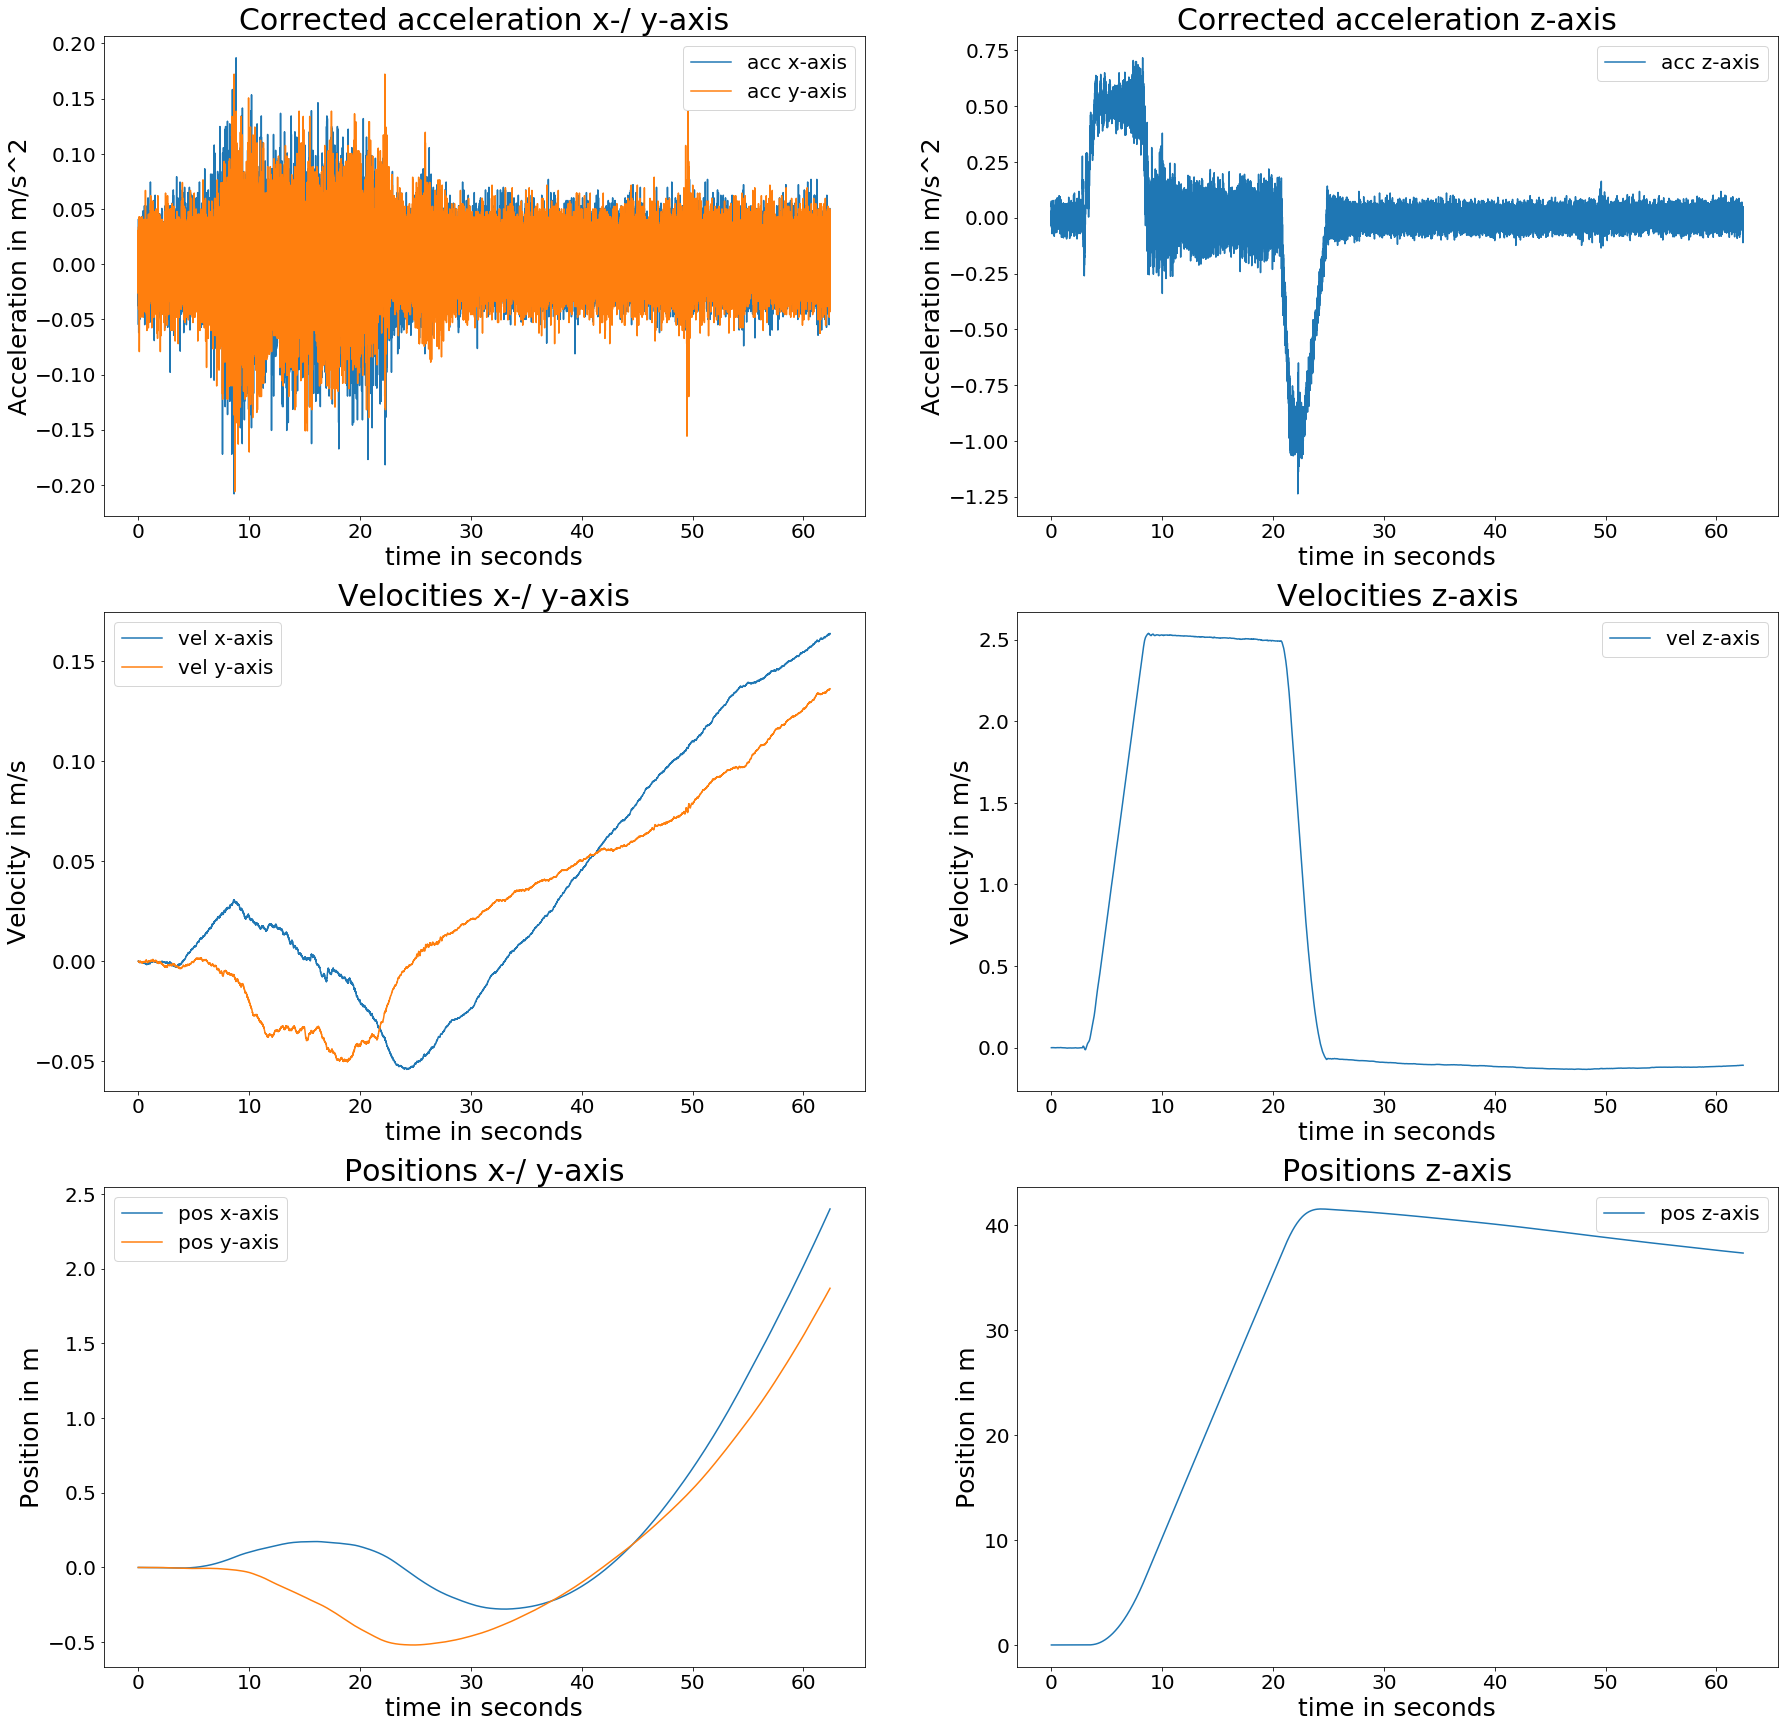

Run 2
(40000,) (40000,)
Max height: 41.589100m


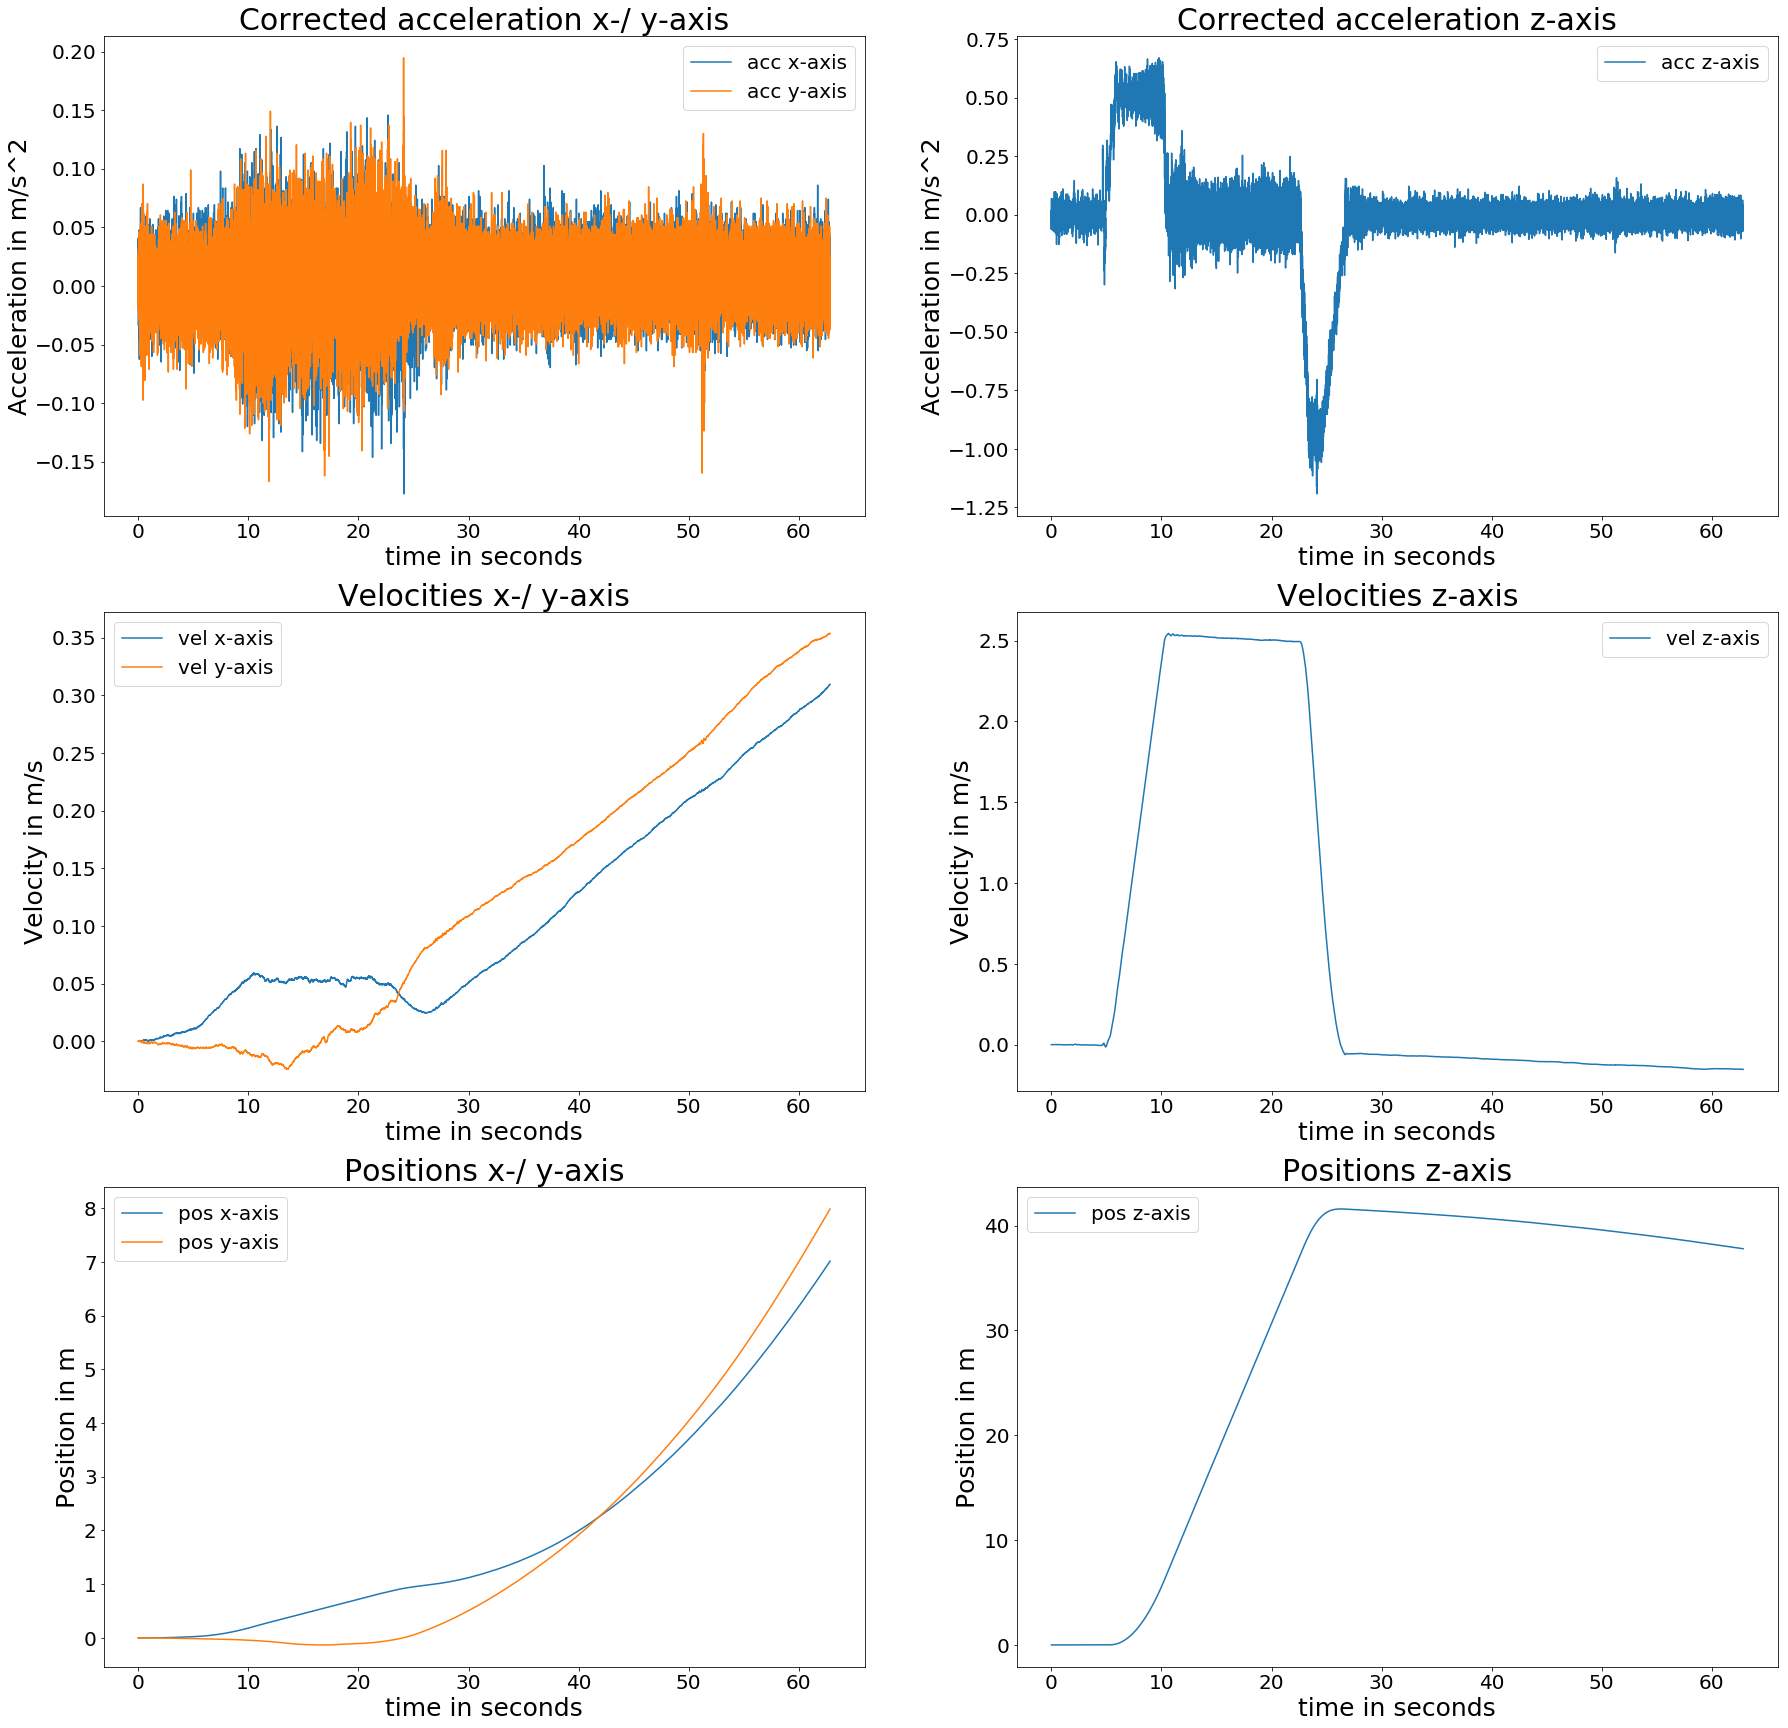

Run 3
(40000,) (40000,)
Max height: 40.349201m


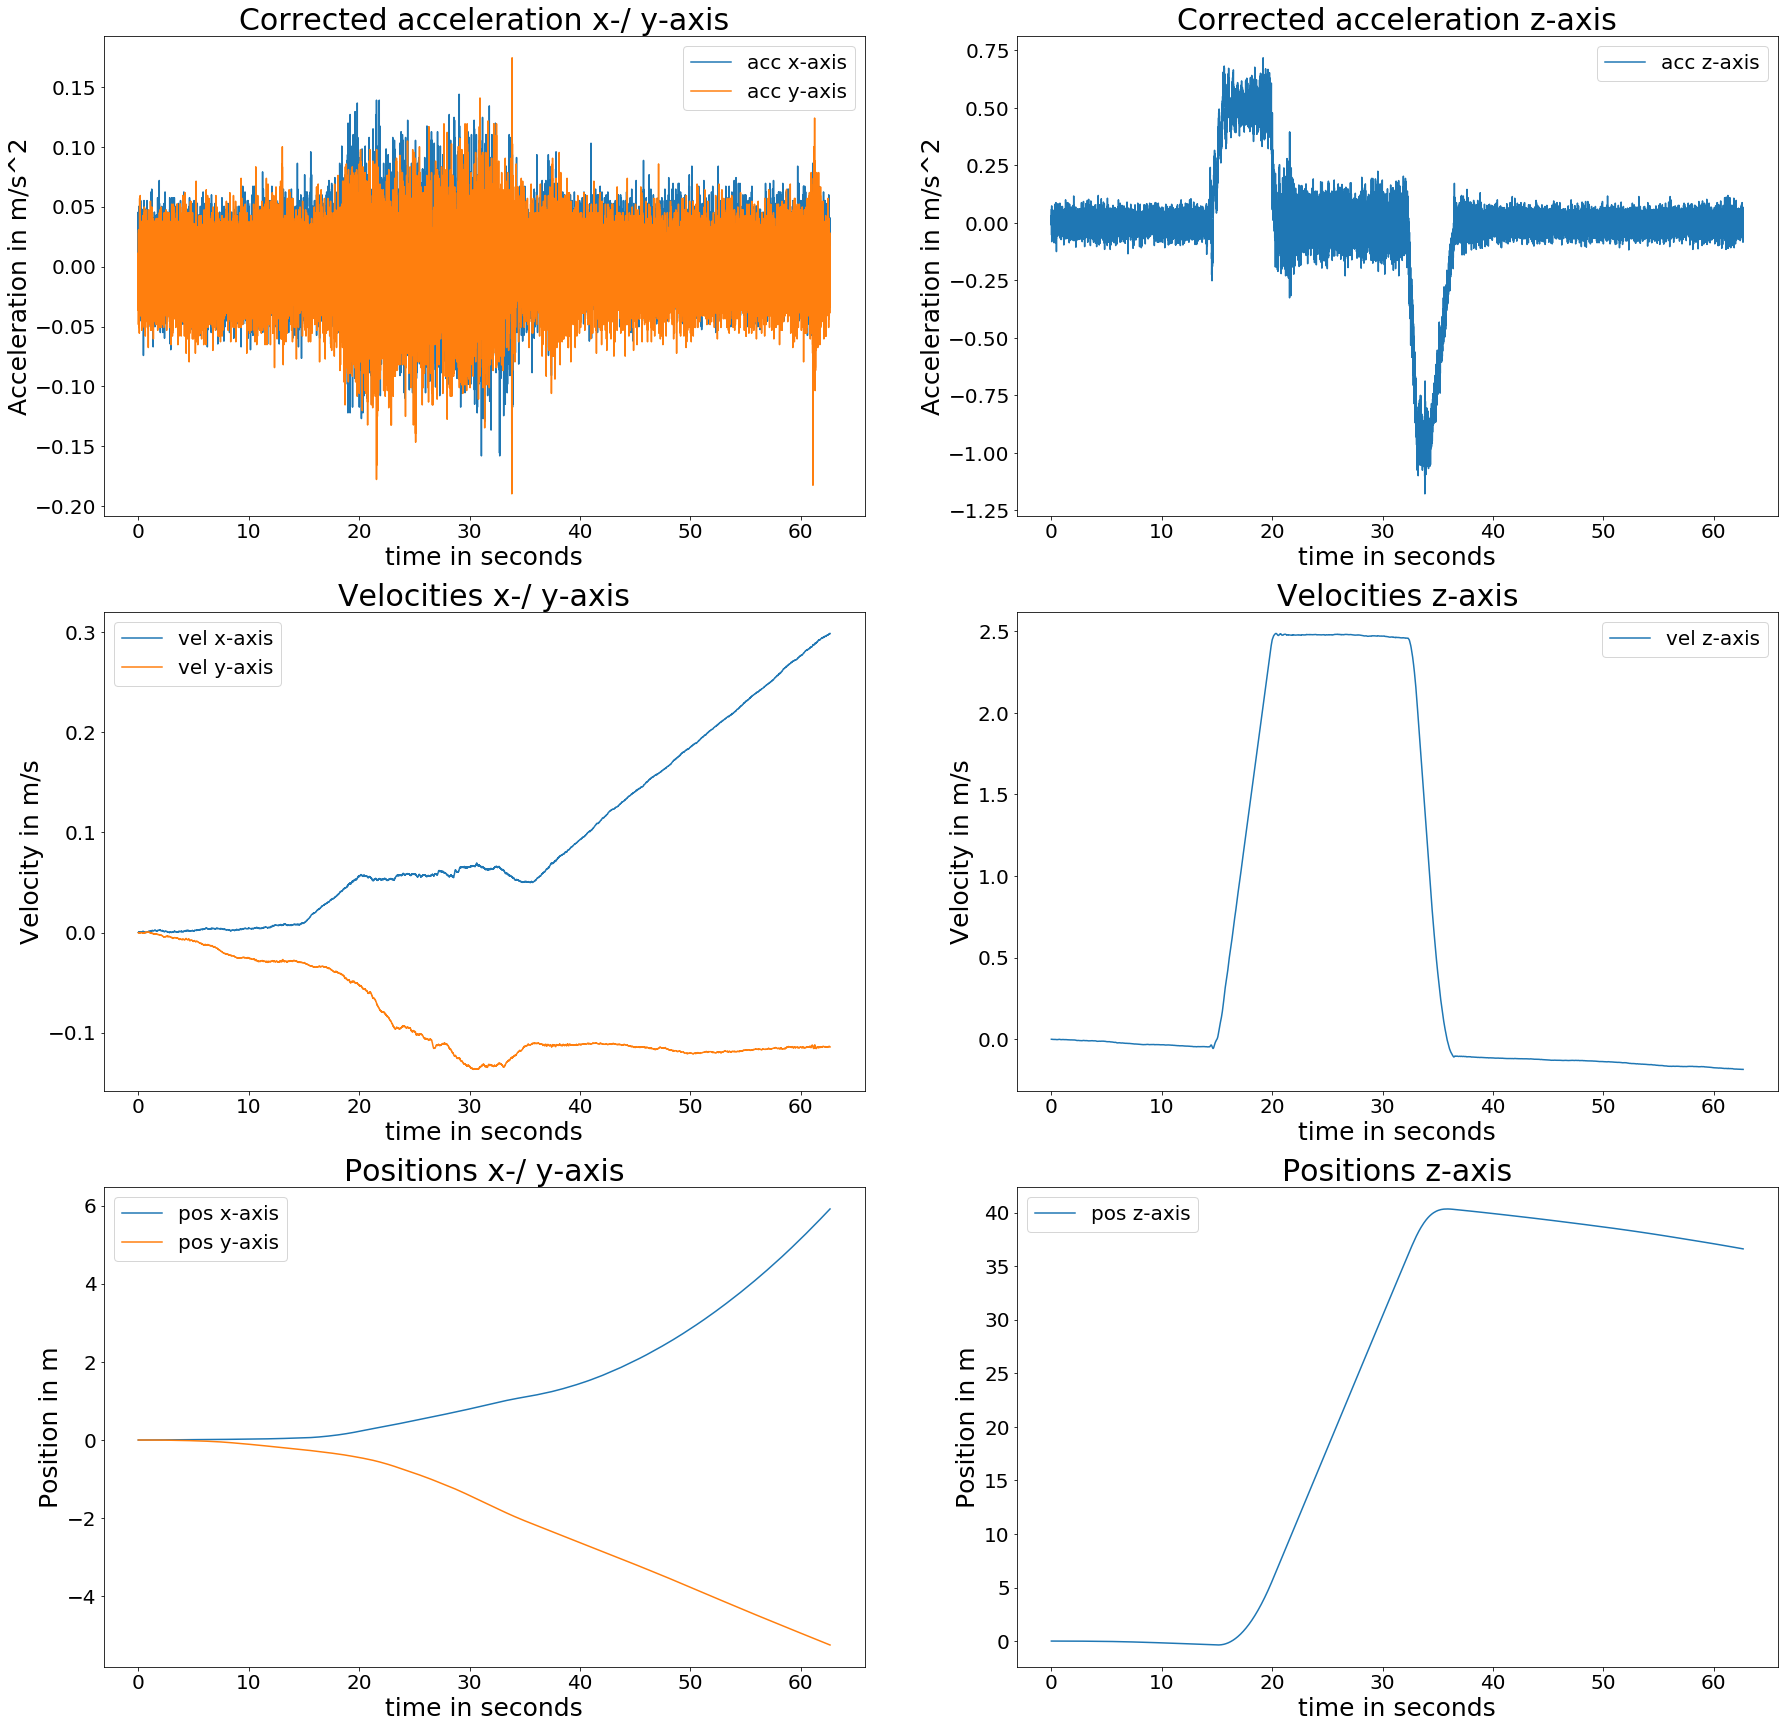

Run 4
(30000,) (30000,)
Max height: 41.967400m


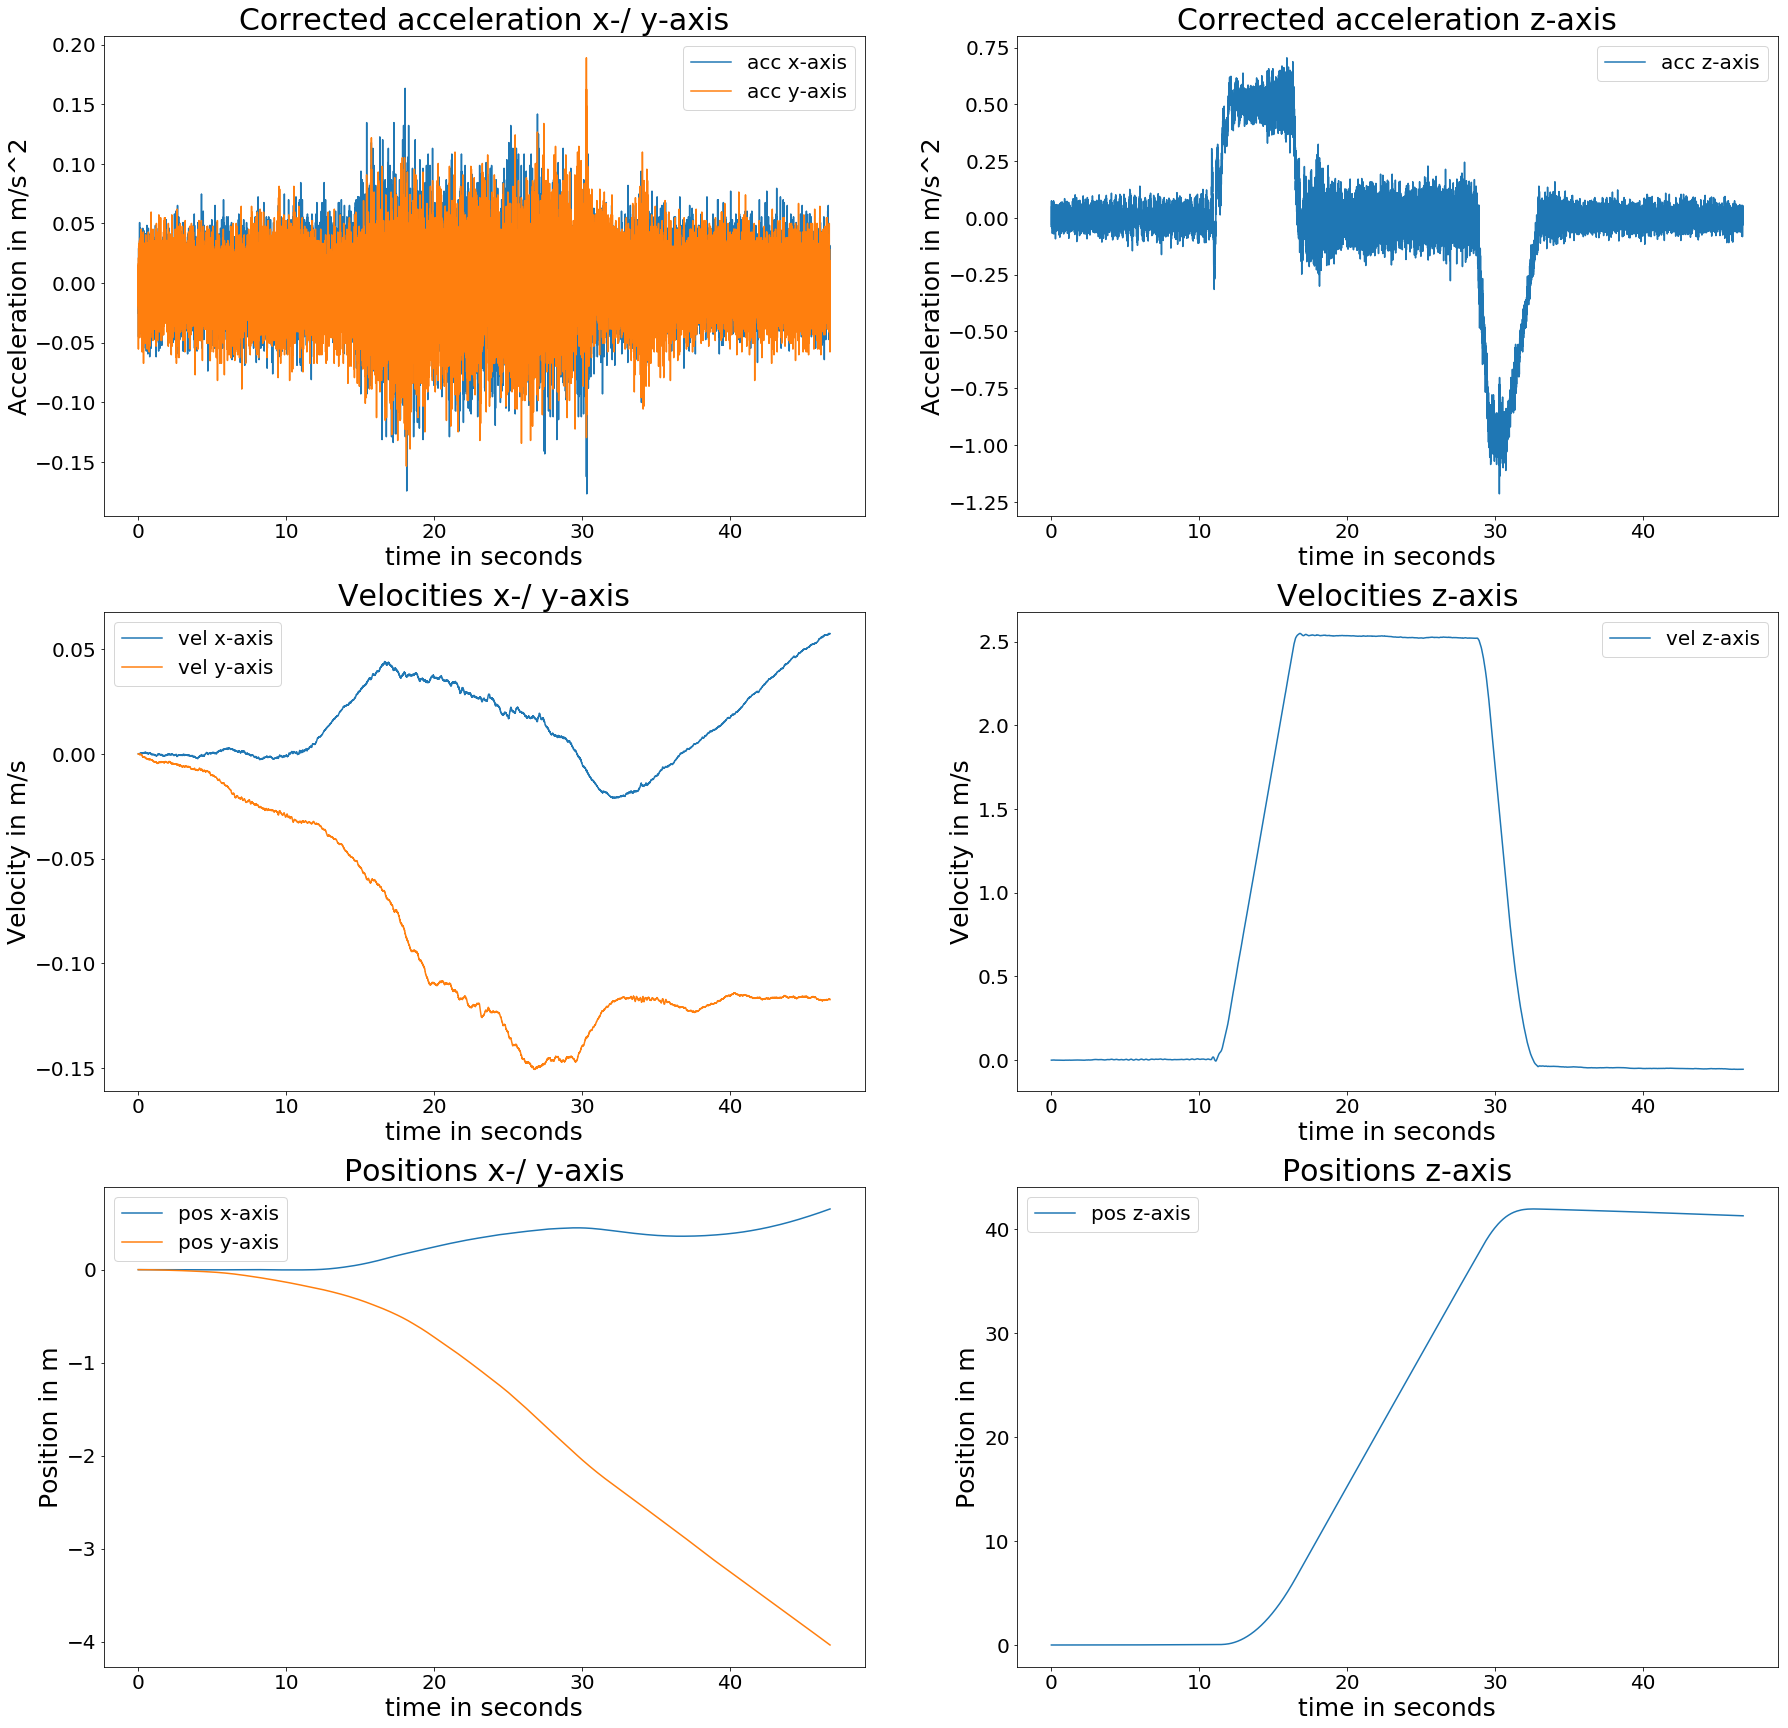

Run 5
(30000,) (30000,)
Max height: 41.241699m


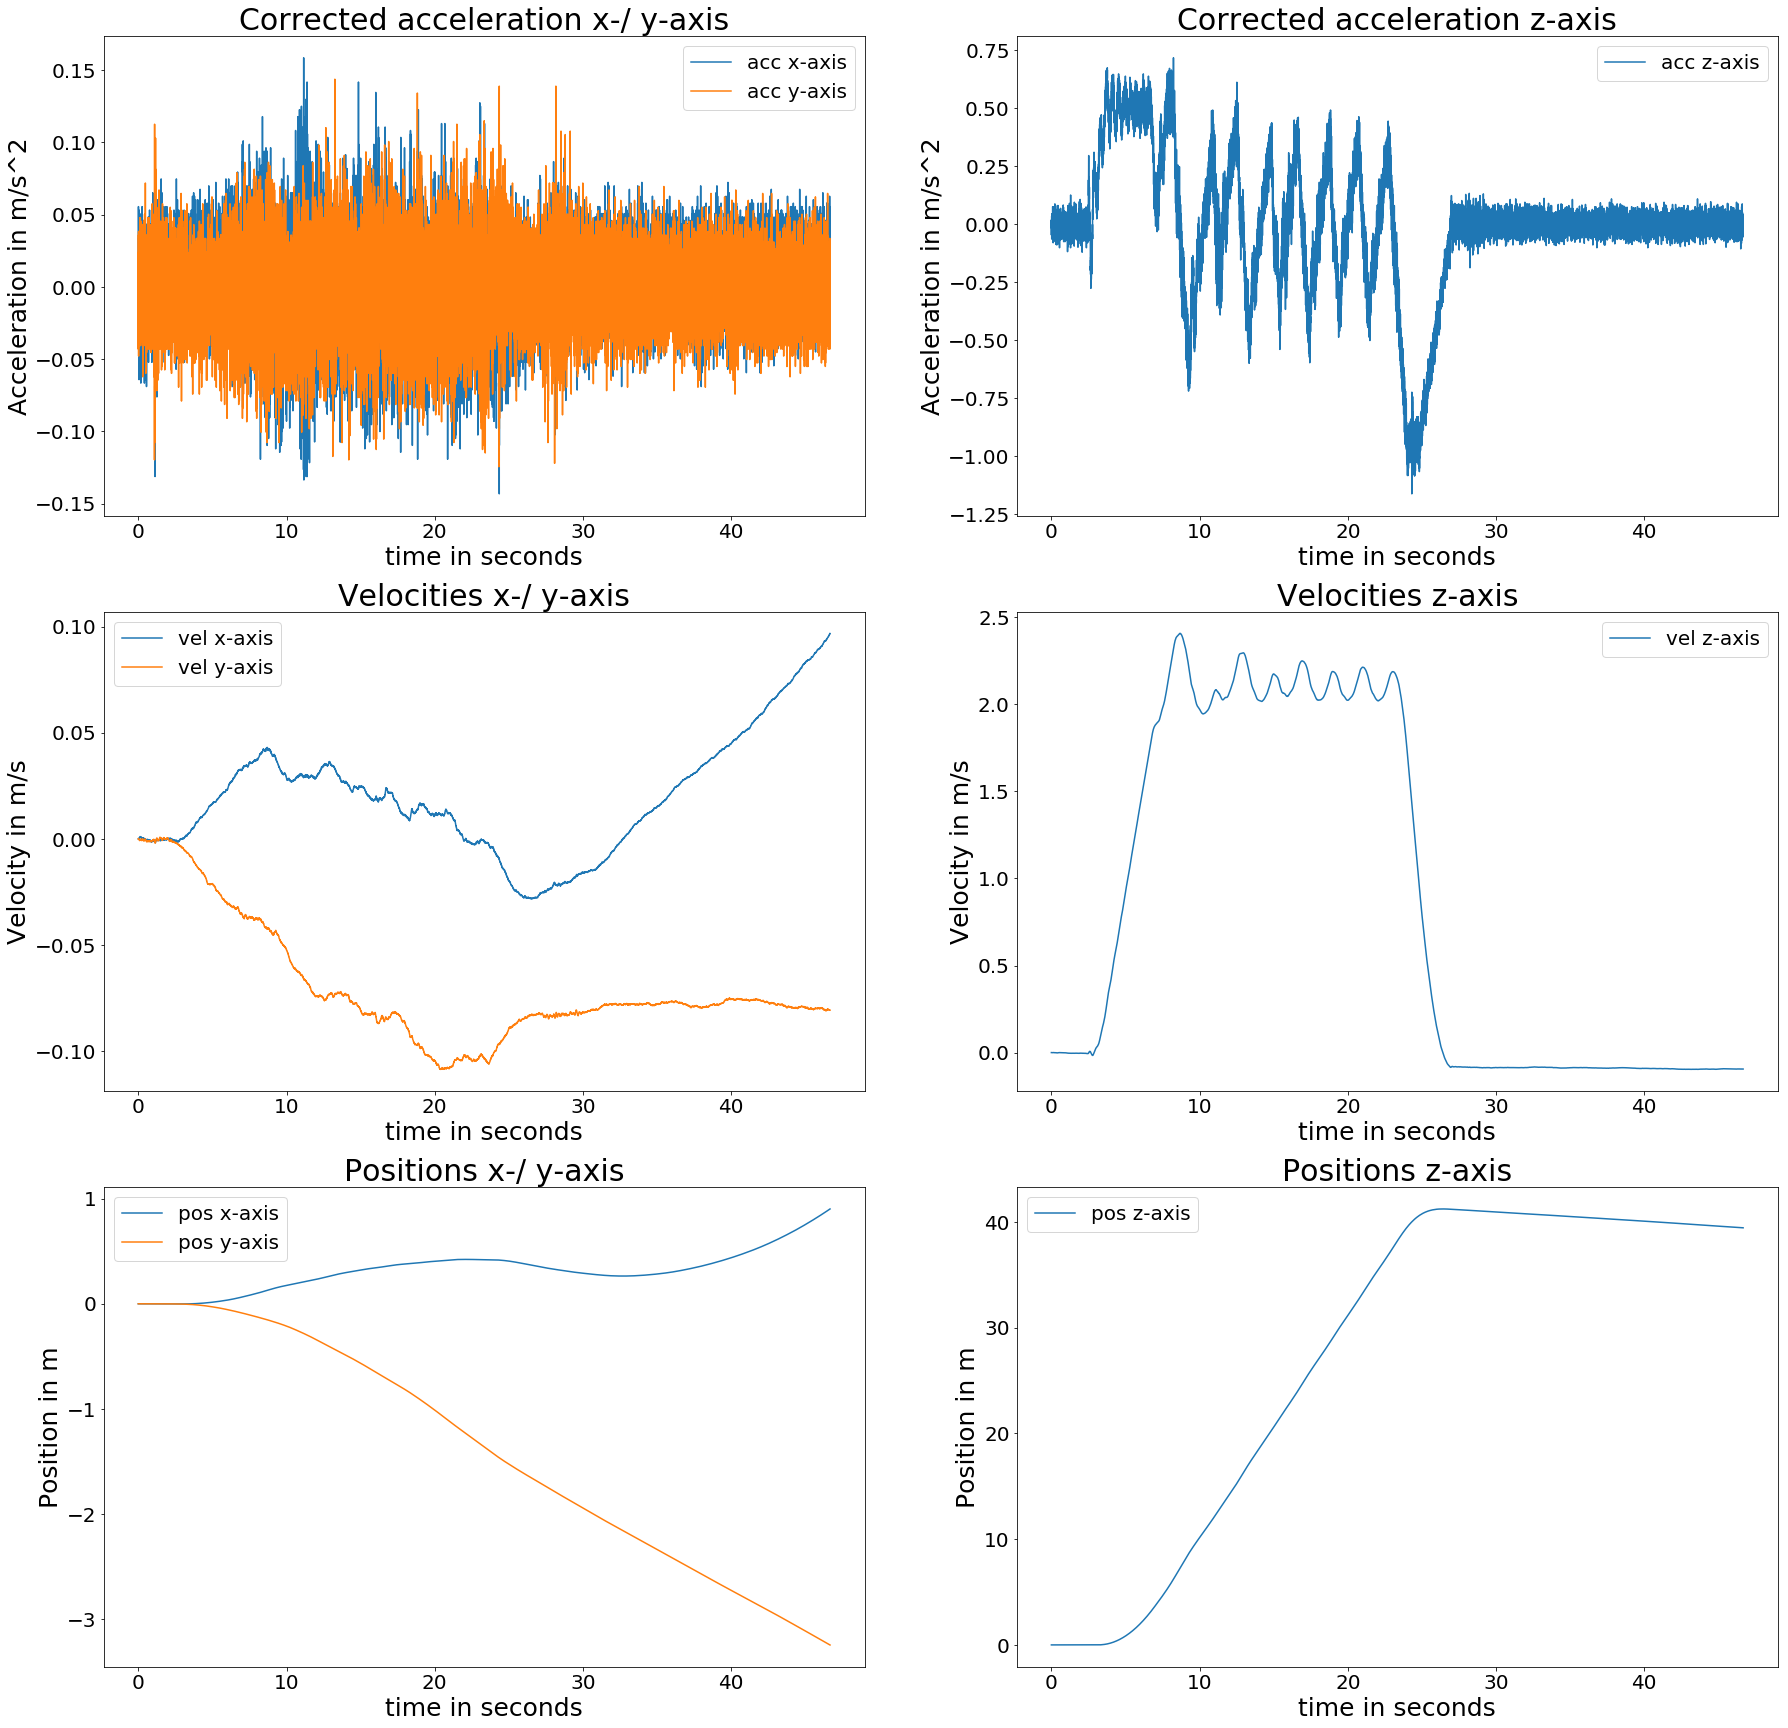

Run 6
(30000,) (30000,)
Max height: 38.993900m


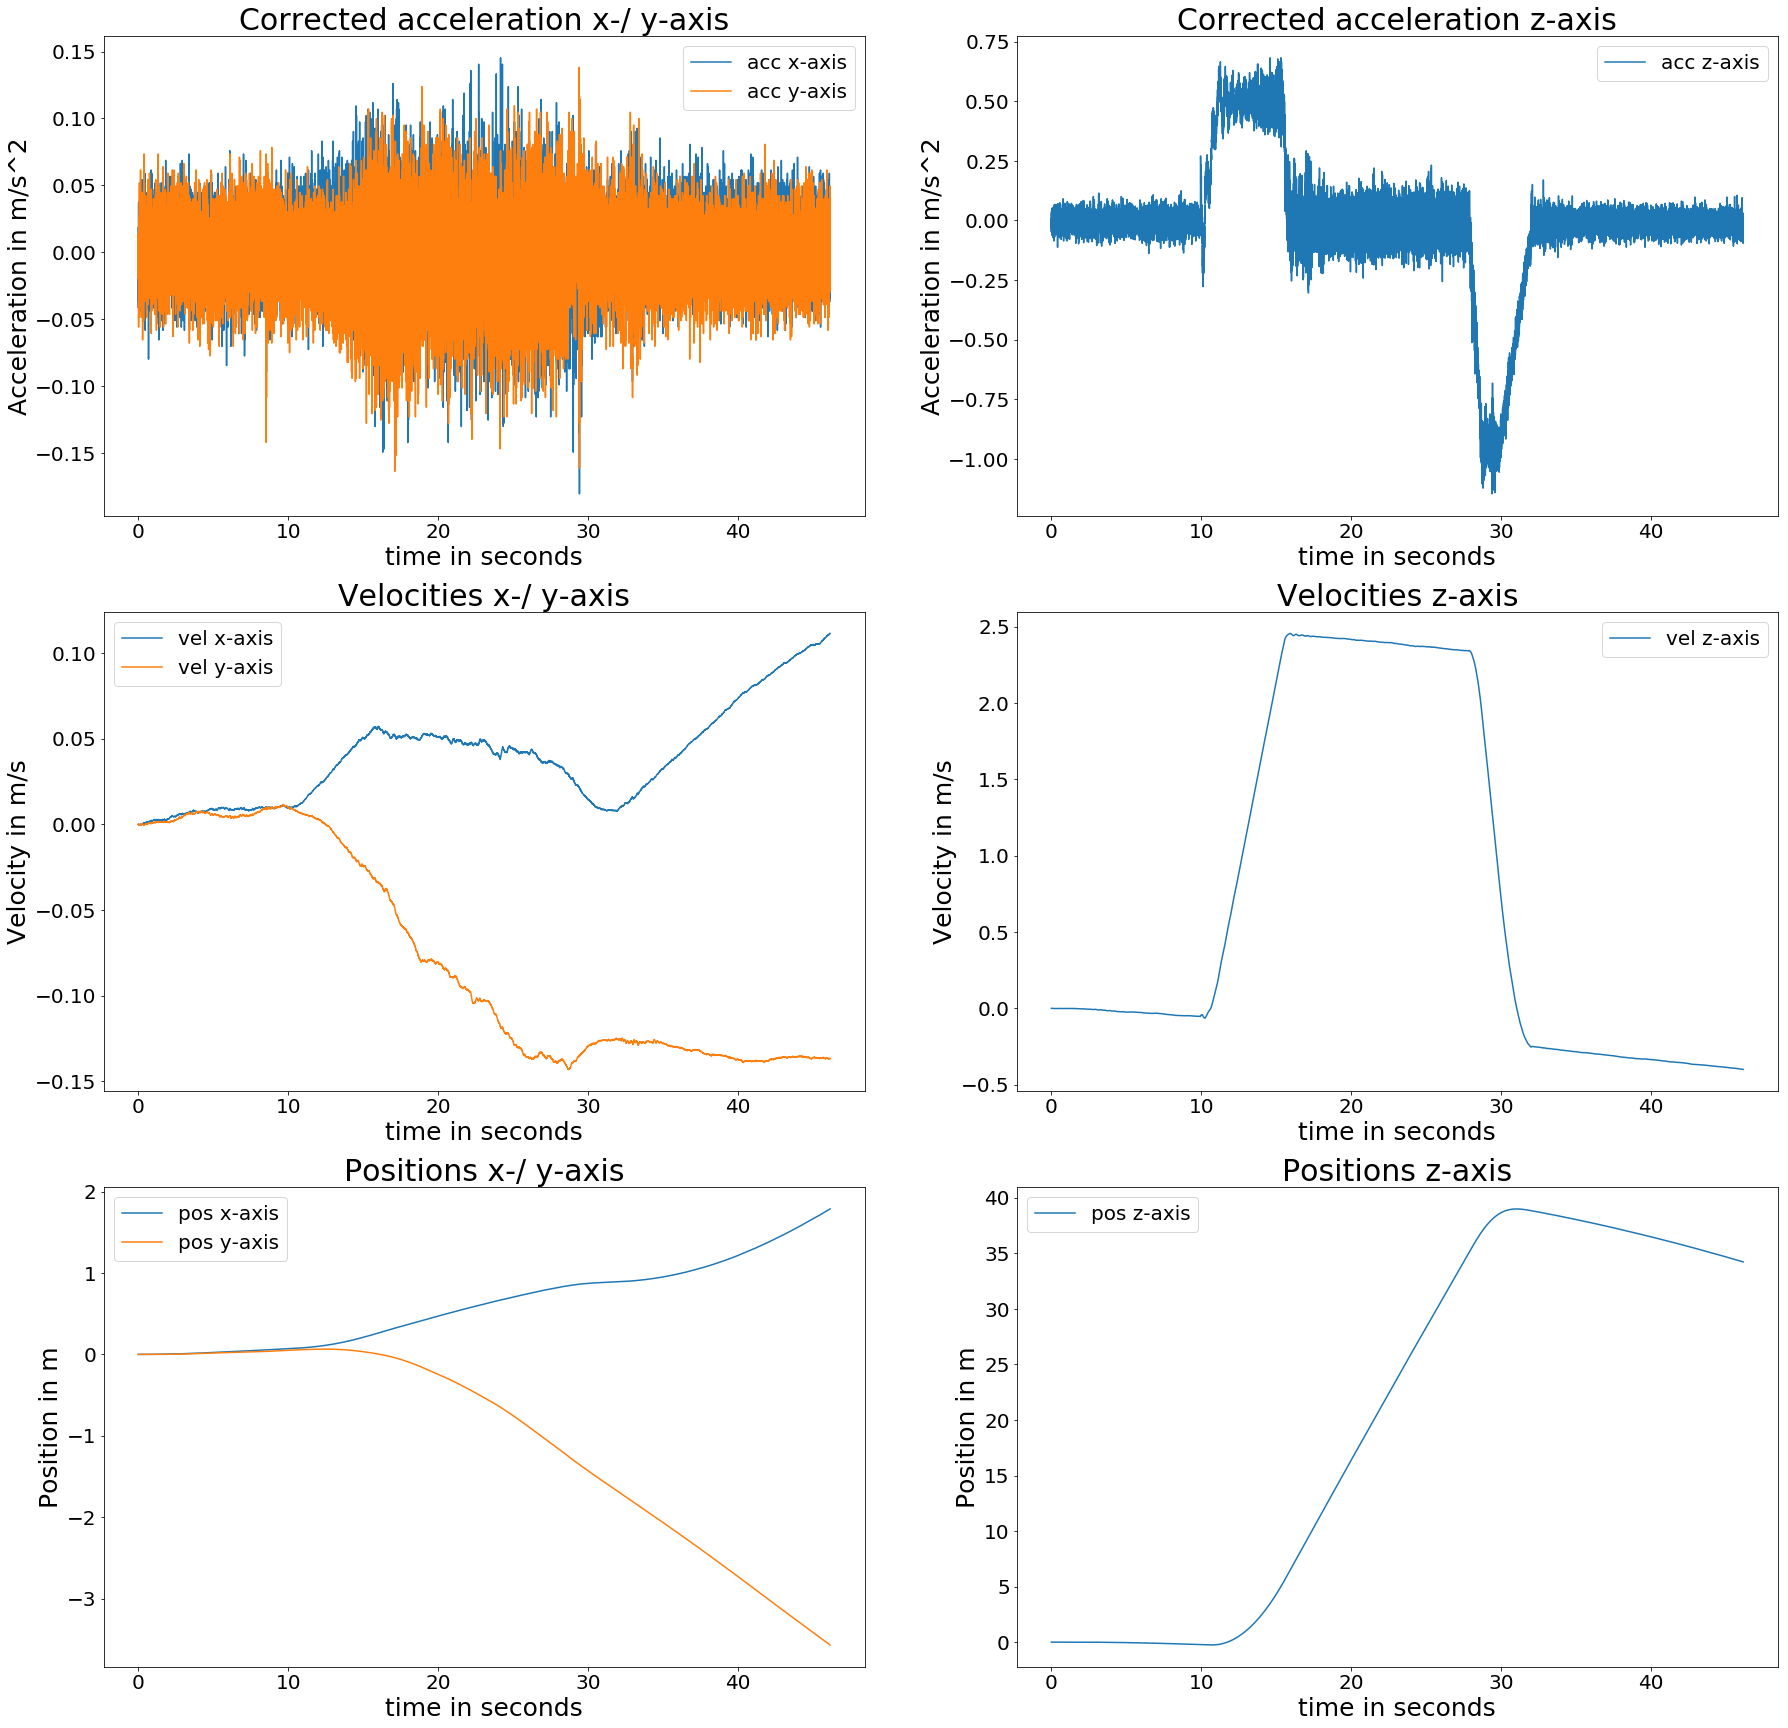

Run 7
(30000,) (30000,)
Max height: 41.229198m


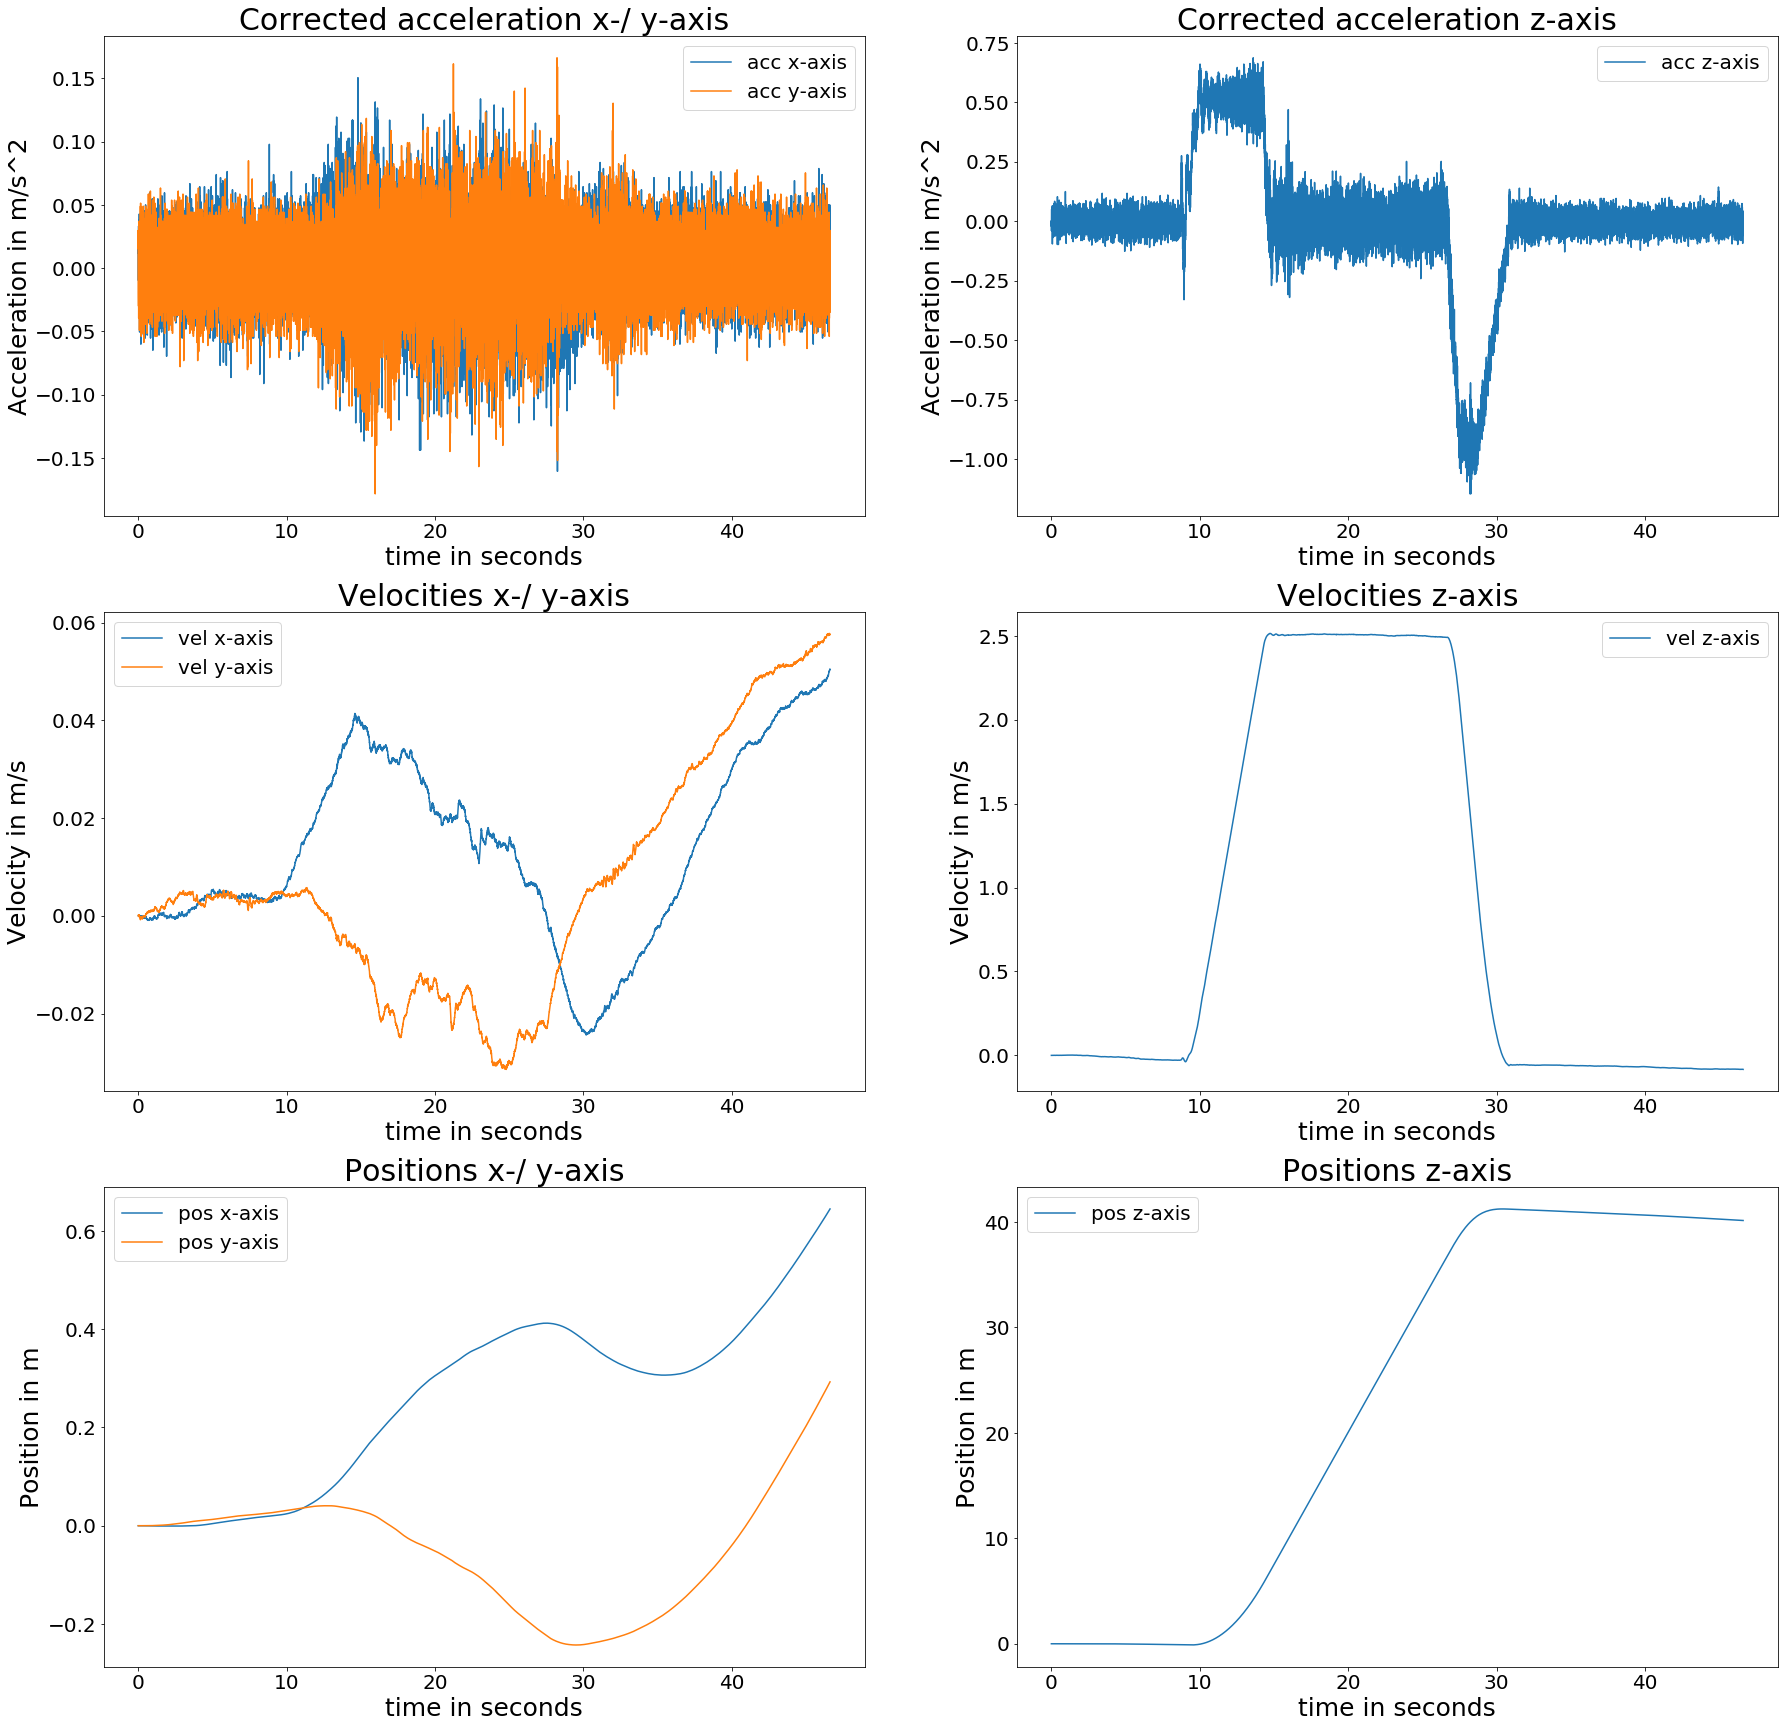

Avg. acceleration deviation: 0.021872 m/s^2
Avg. velocity deviation: 0.148876 m/s
Avg. position deviation: 3.254114 m

Plots 5 runs all up (second run)
Run 1
(100000,) (100000,)
Min height: -0.000099m


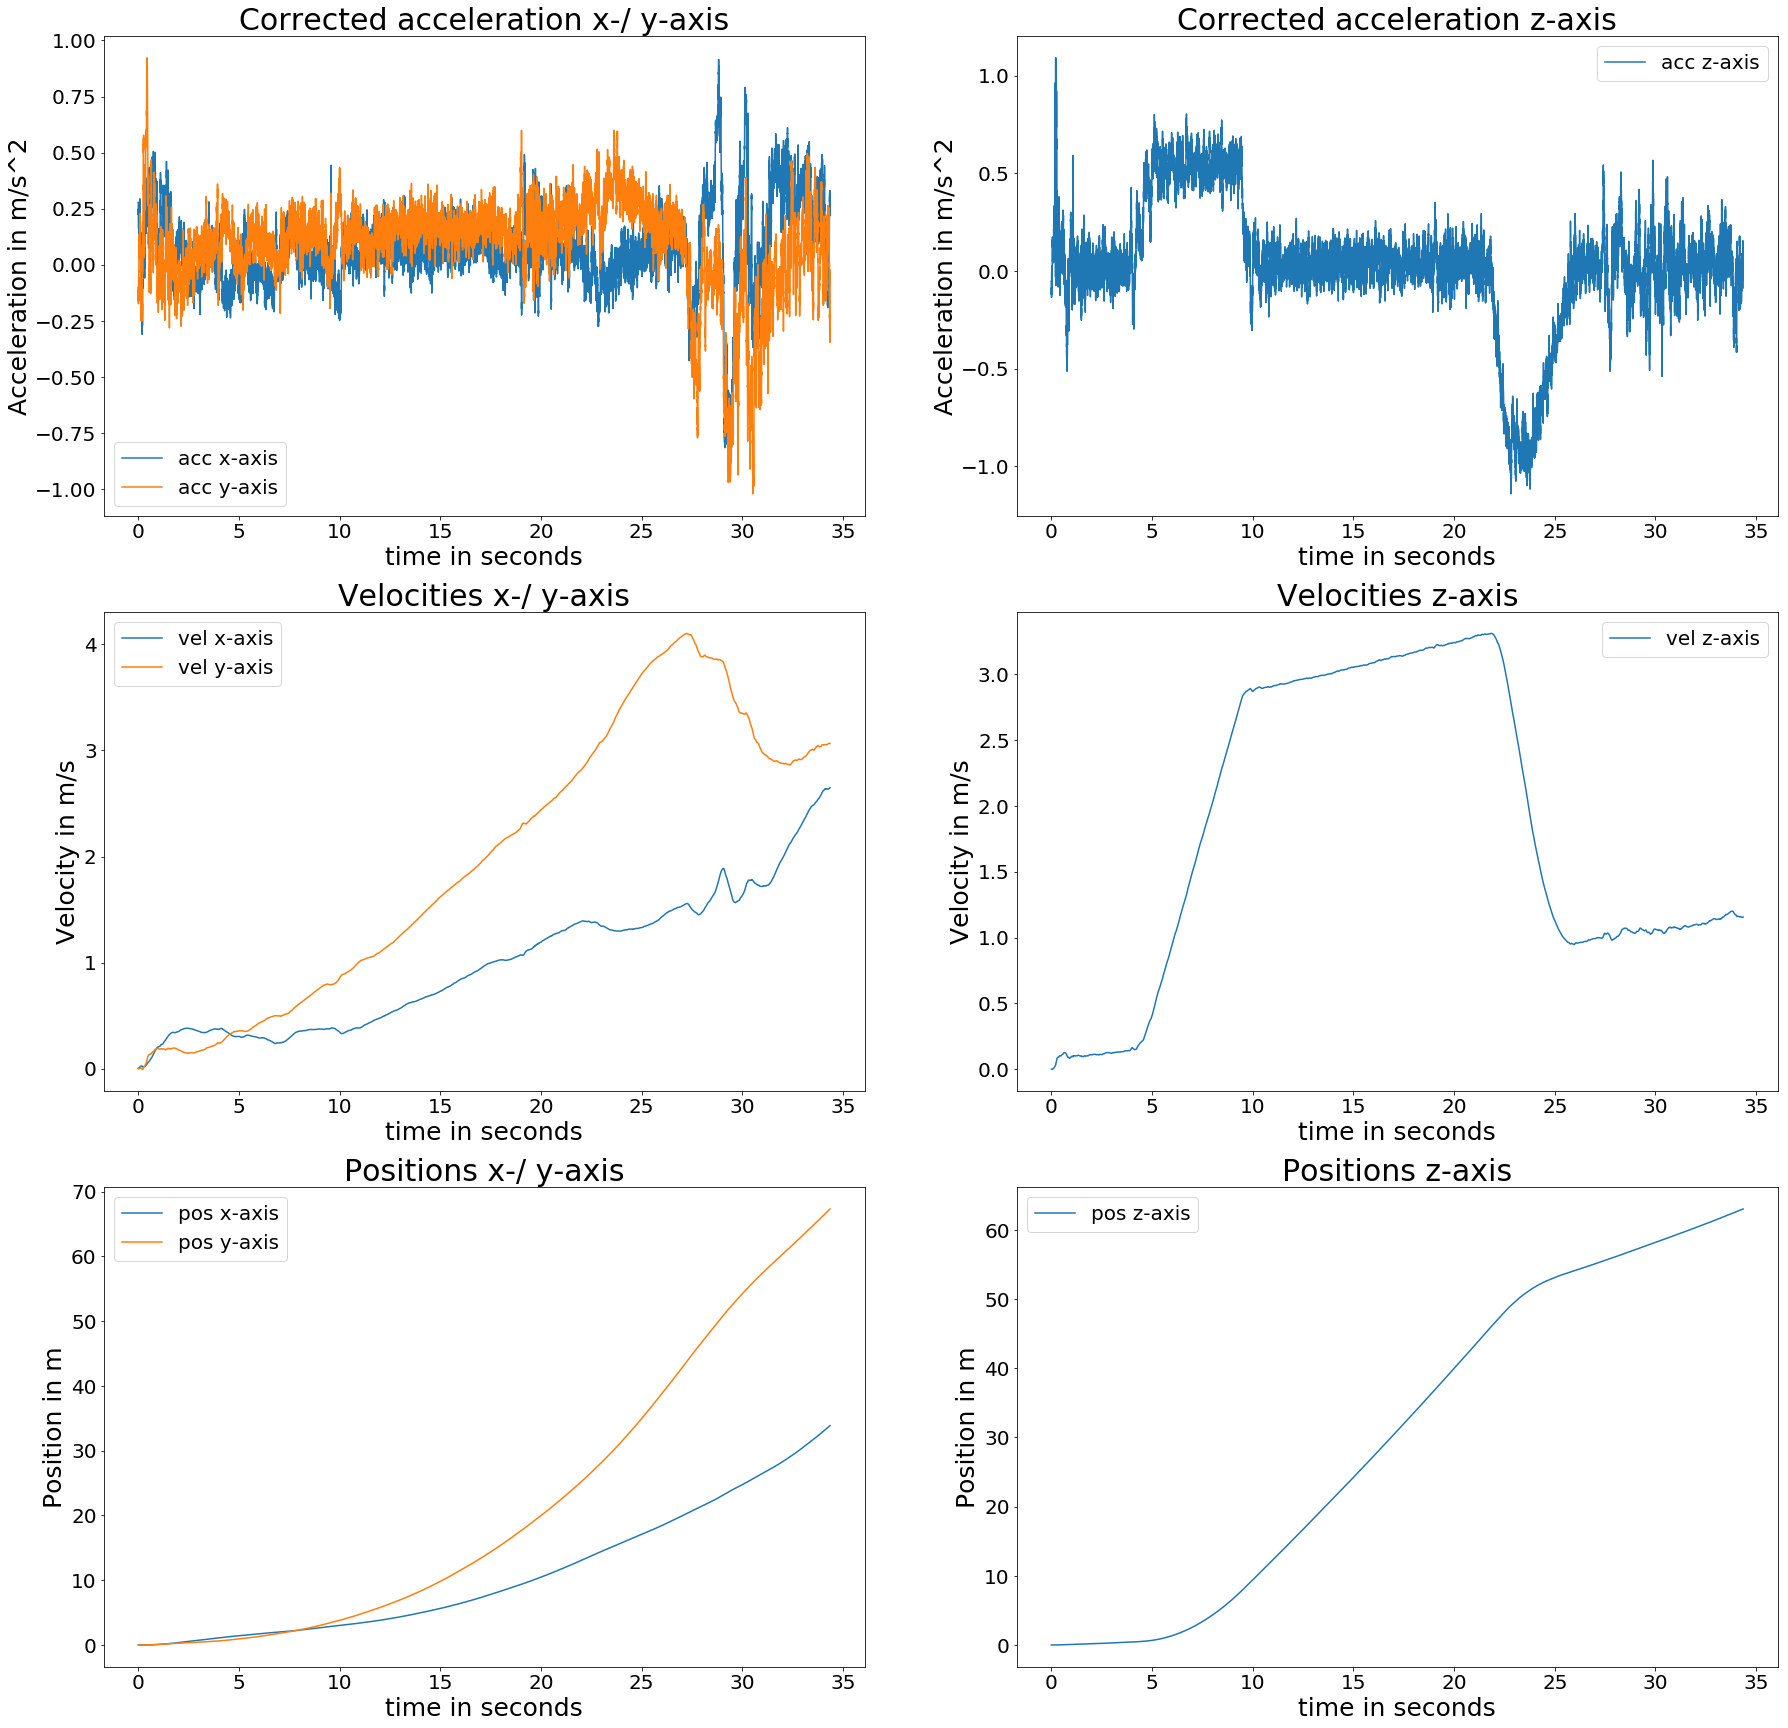

Run 2
(100000,) (100000,)
Min height: -0.000400m


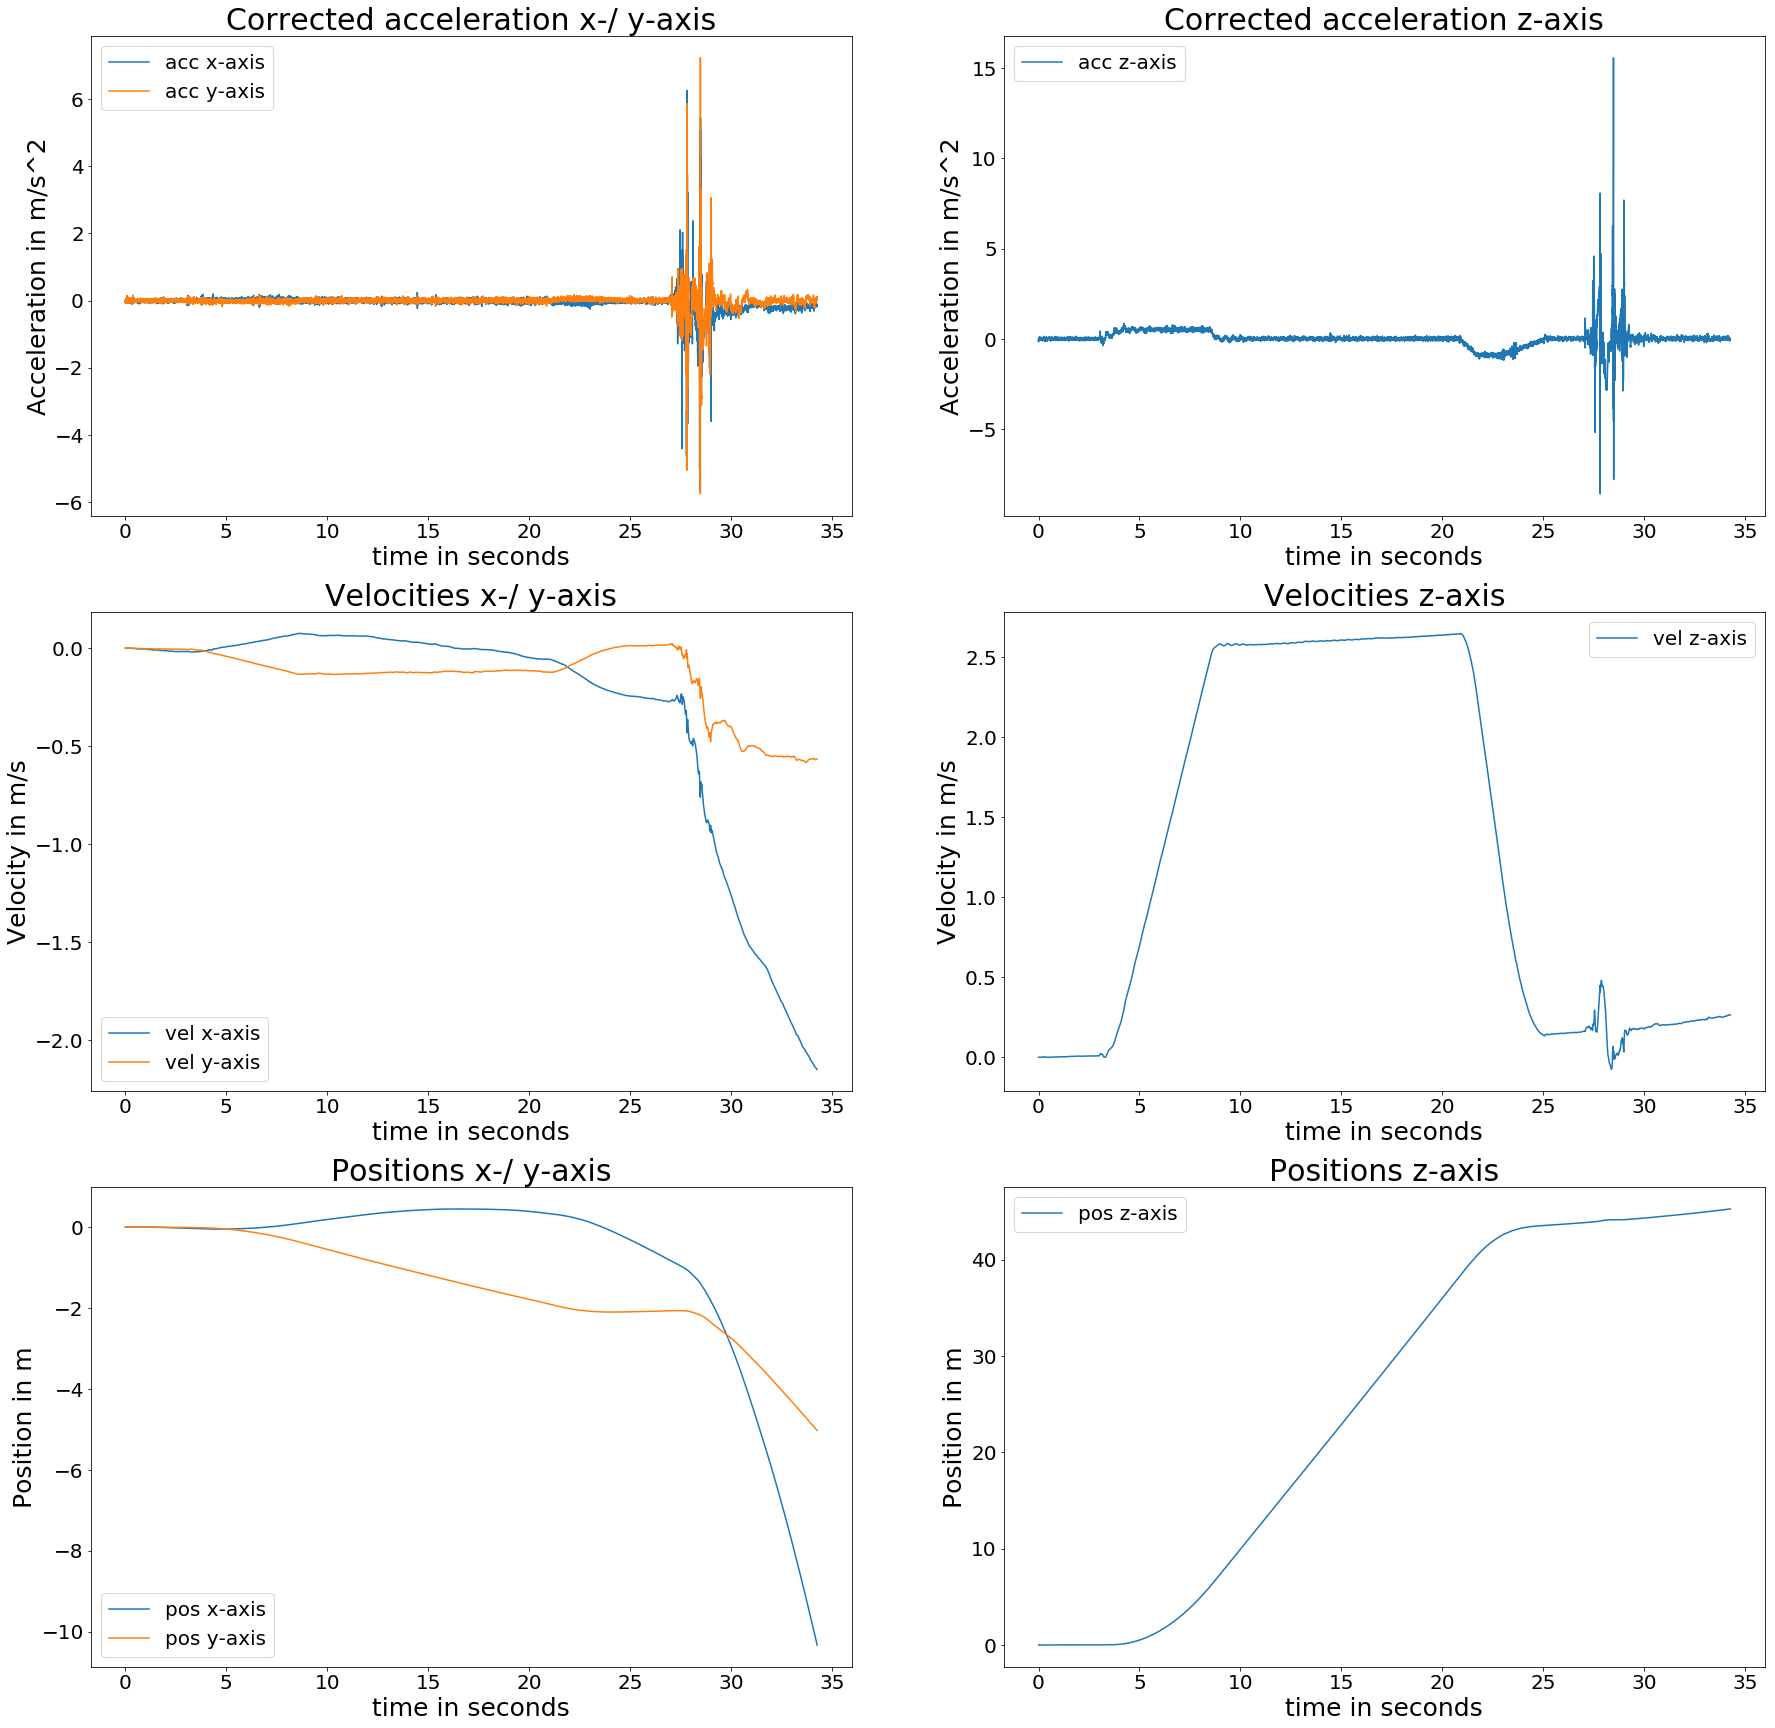

Run 3
(100000,) (100000,)
Min height: -0.000984m


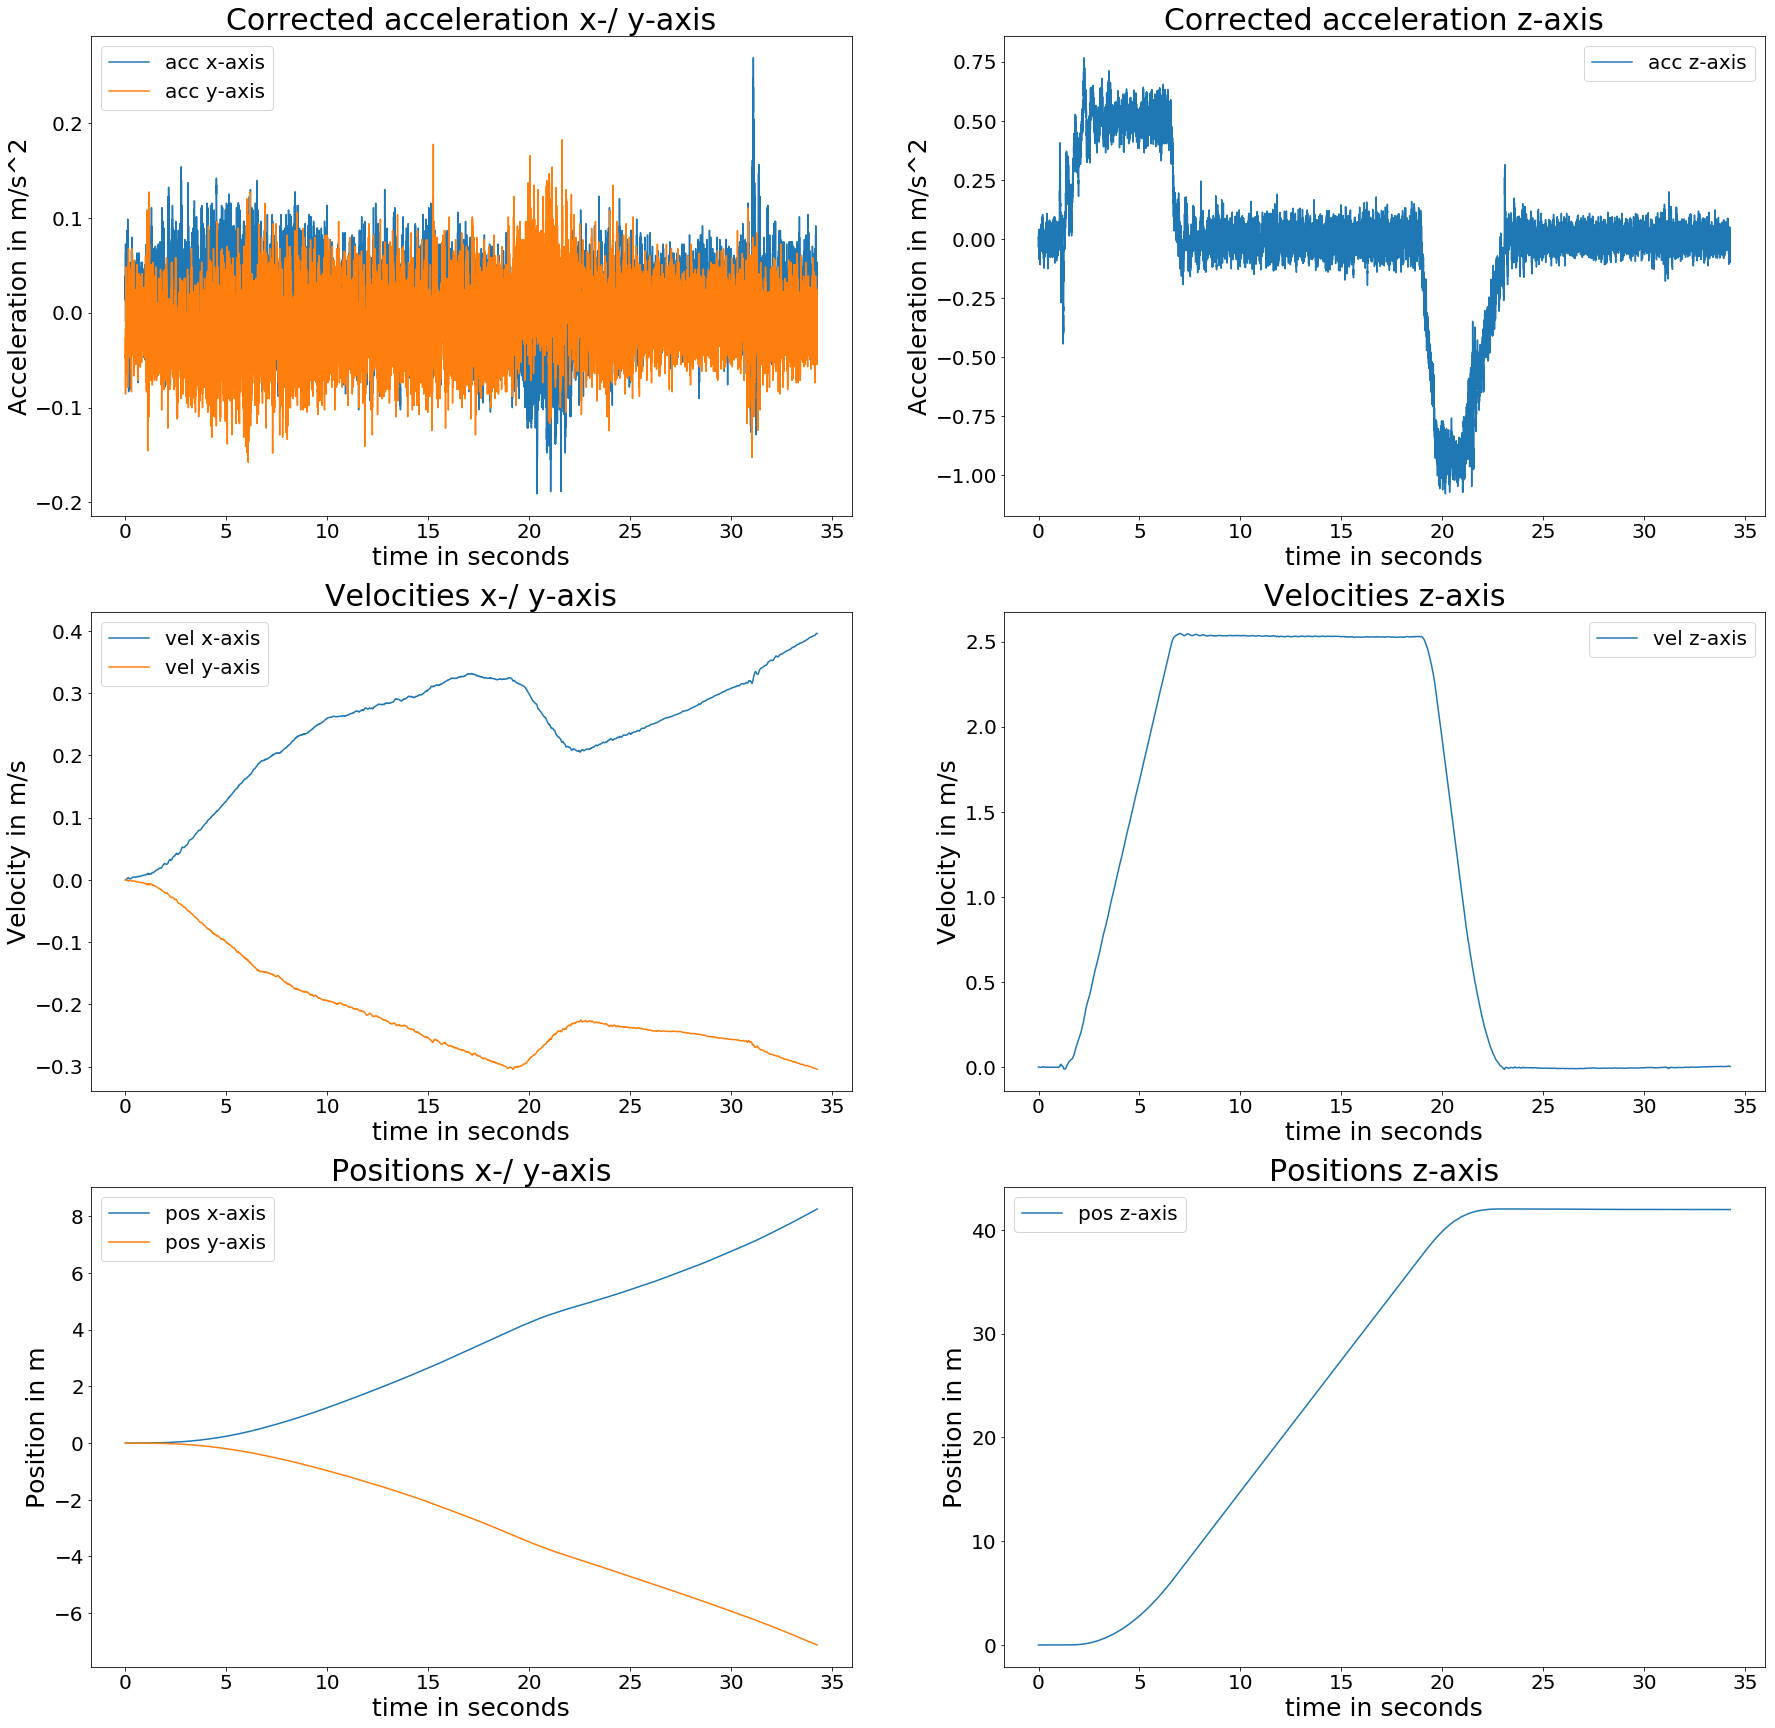

Run 4
(100000,) (100000,)
Min height: -0.019218m


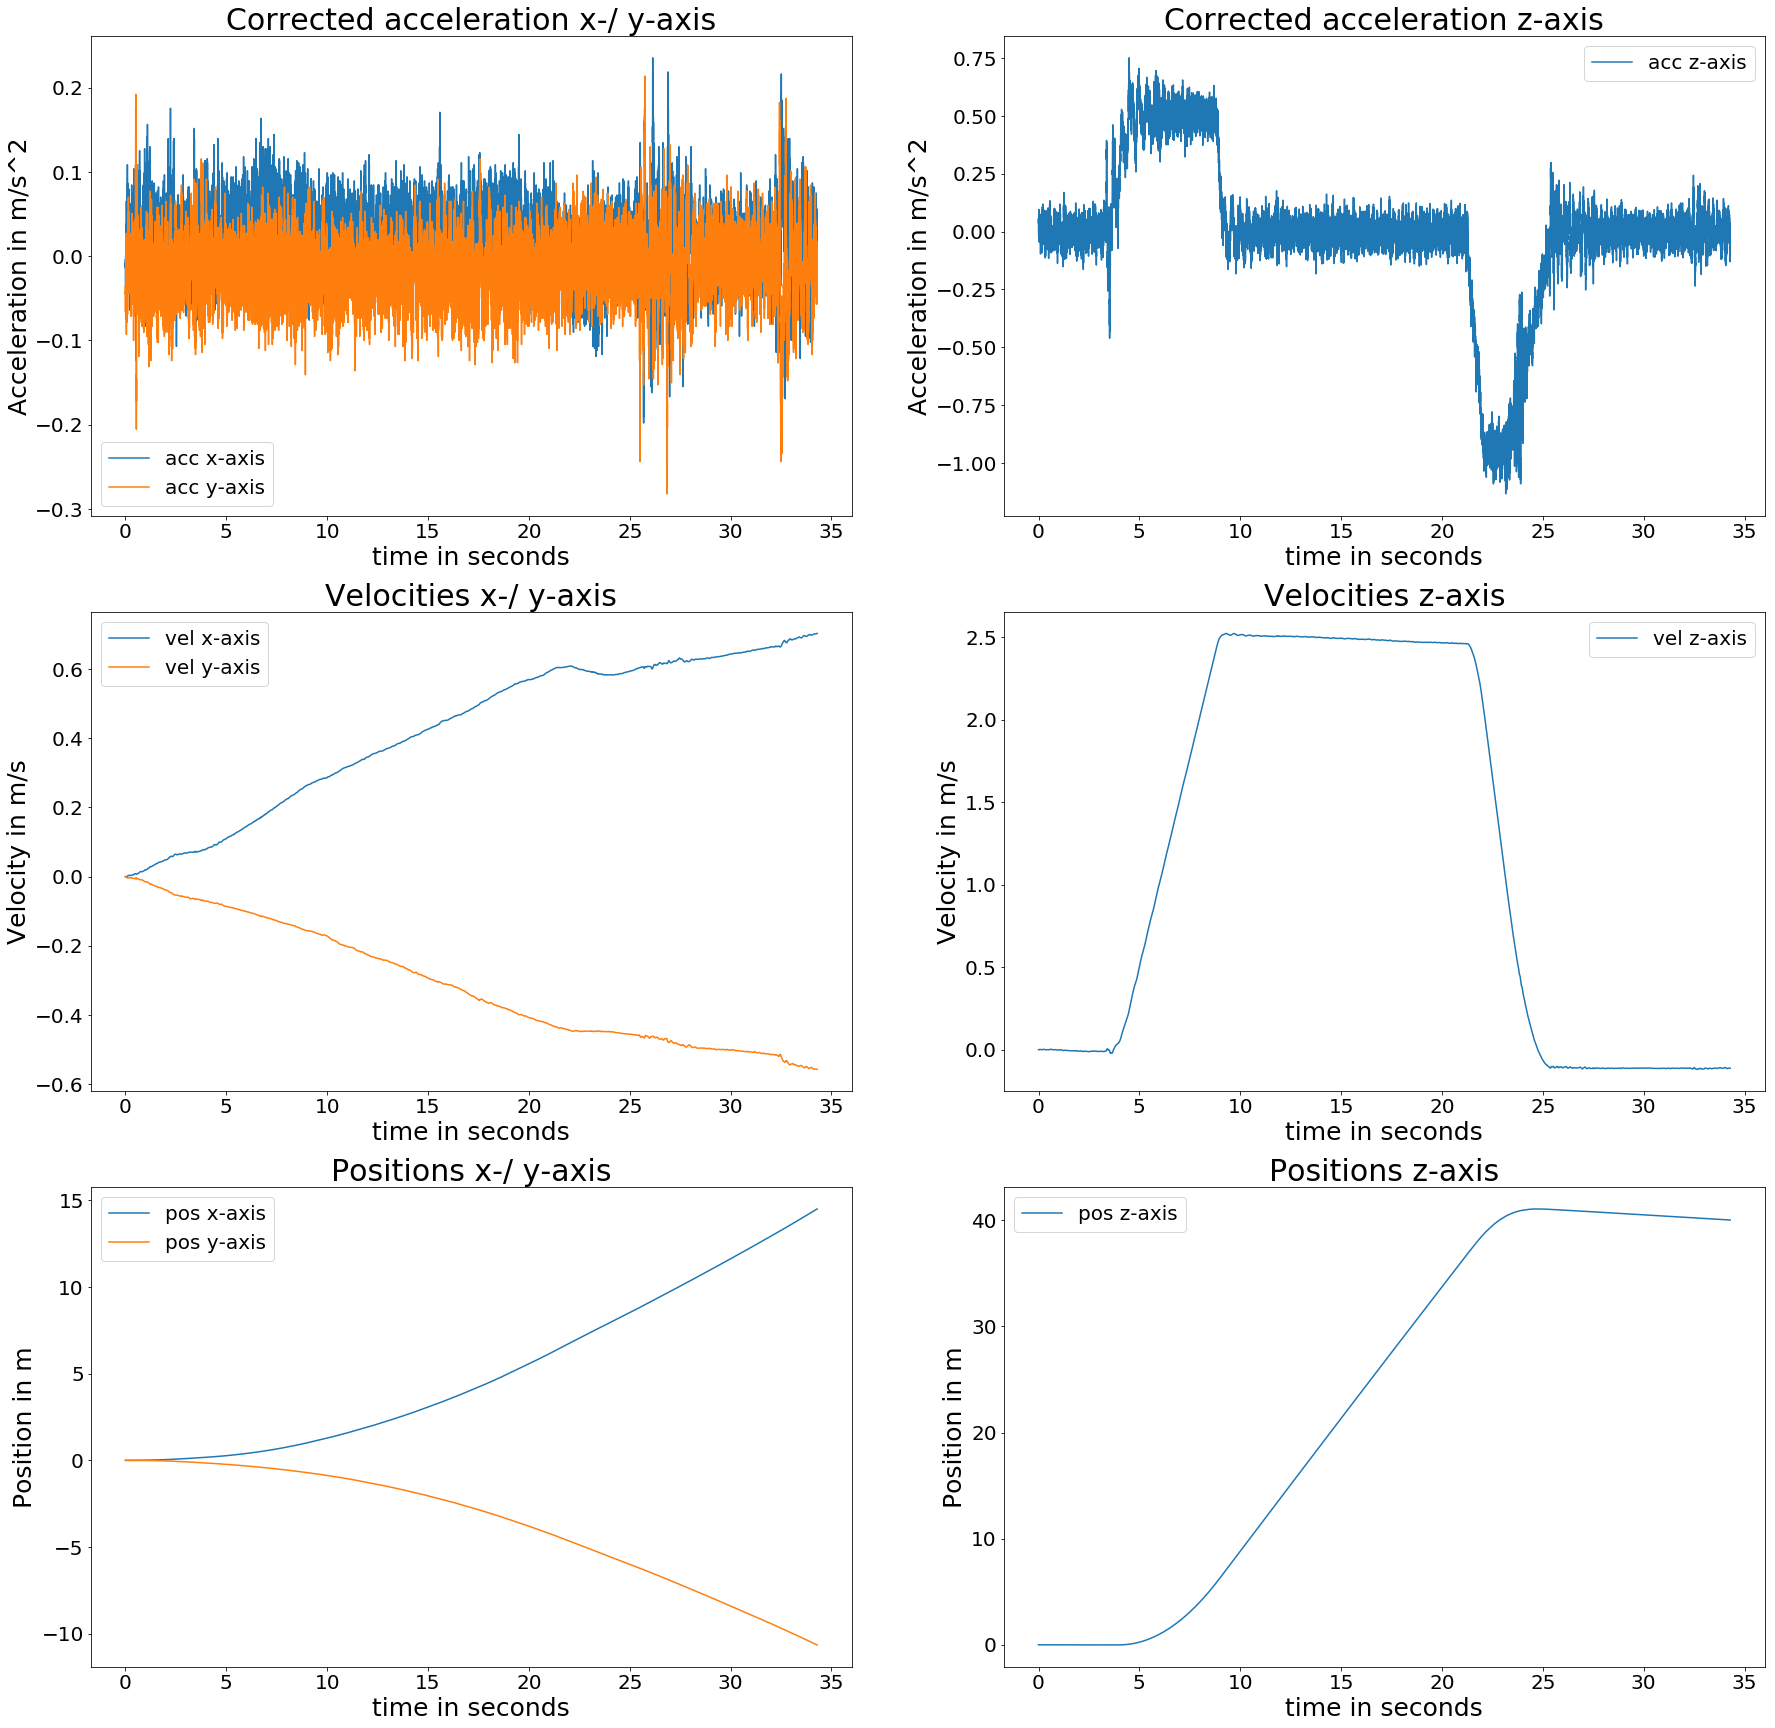

Run 5
(100000,) (100000,)
Min height: -0.038276m


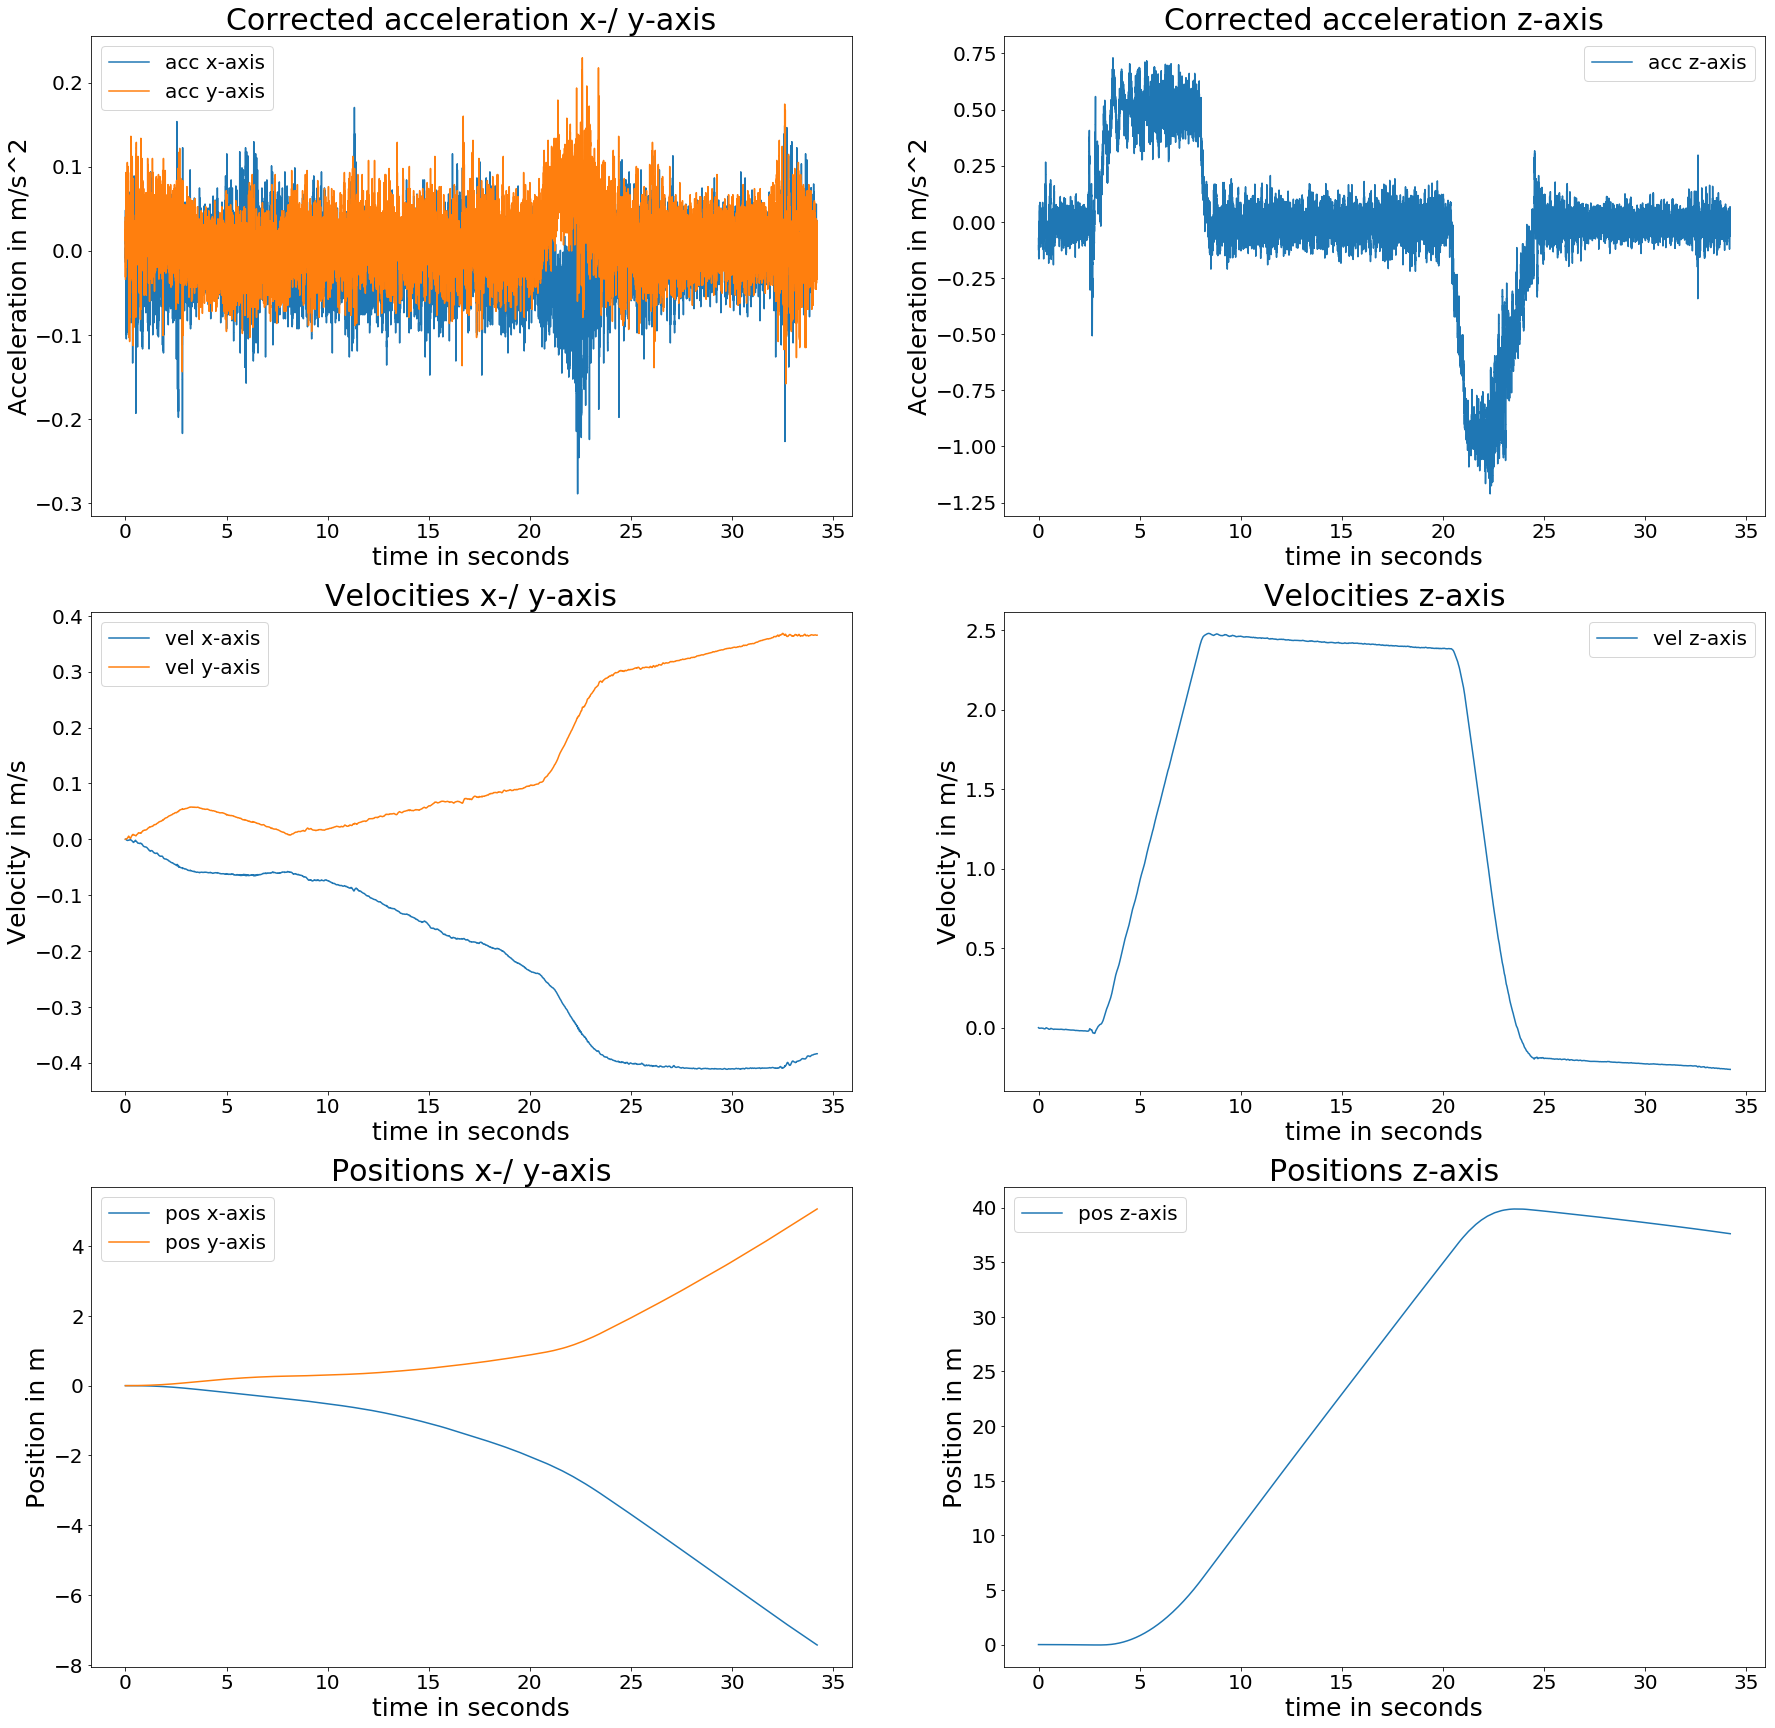

Avg. acceleration deviation: 0.022321 m/s^2
Avg. velocity deviation: 1.113970 m/s
Avg. position deviation: 16.959014 m

Plots 5 runs all down (second run)
Run 1
(100000,) (100000,)
Min height: -43.528198m


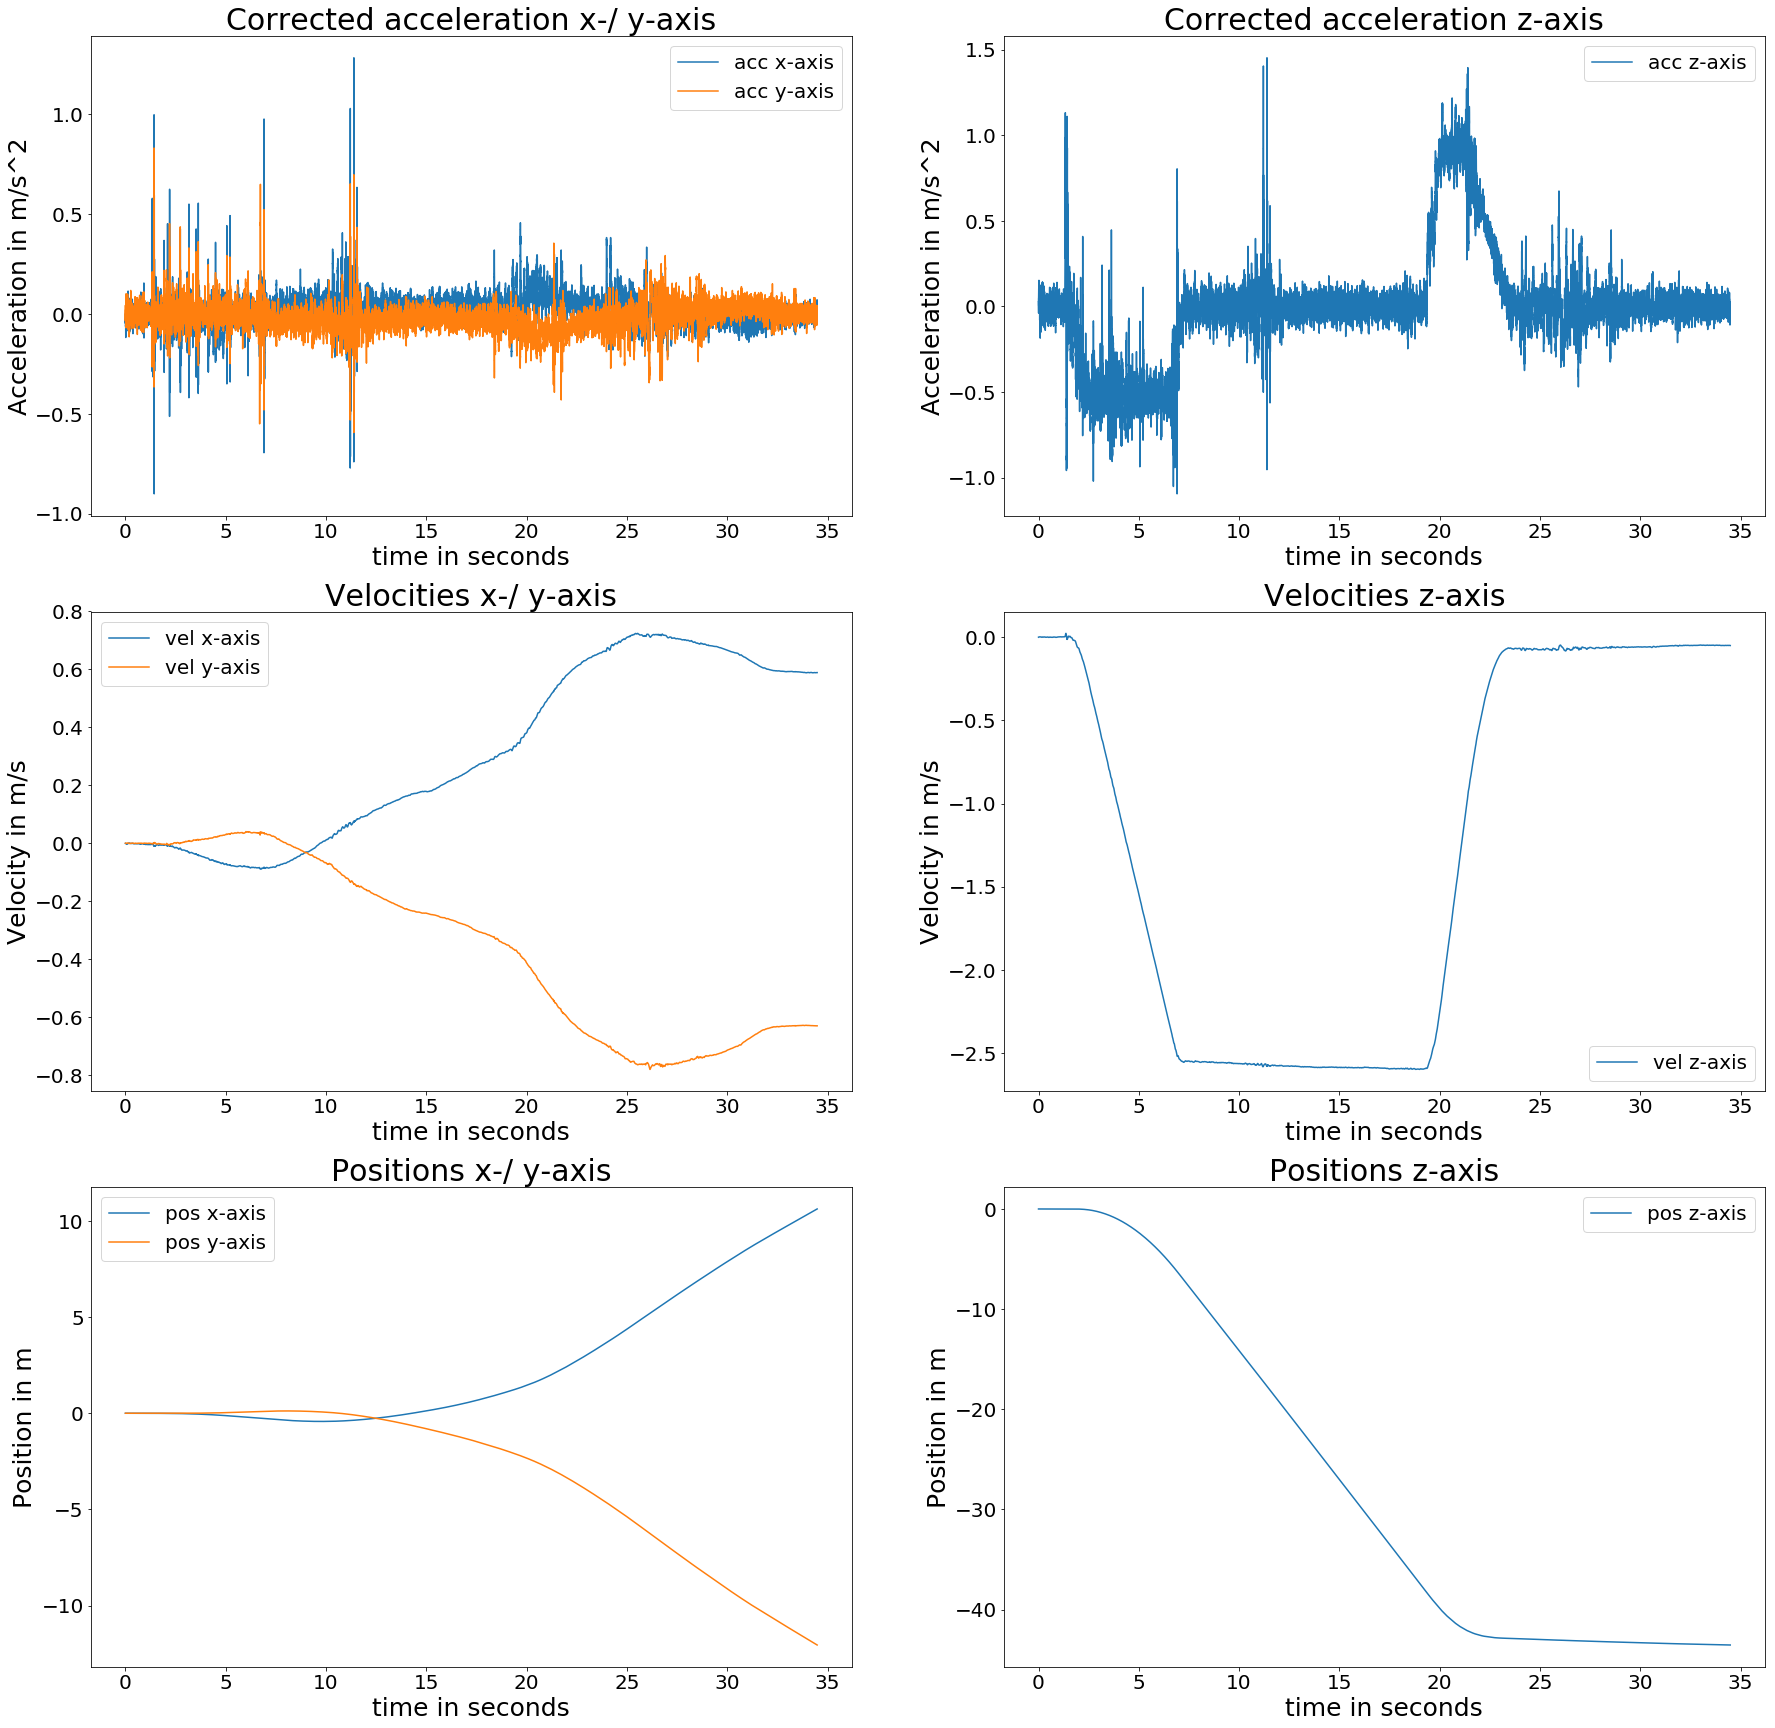

Run 2
(100000,) (100000,)
Min height: -41.069401m


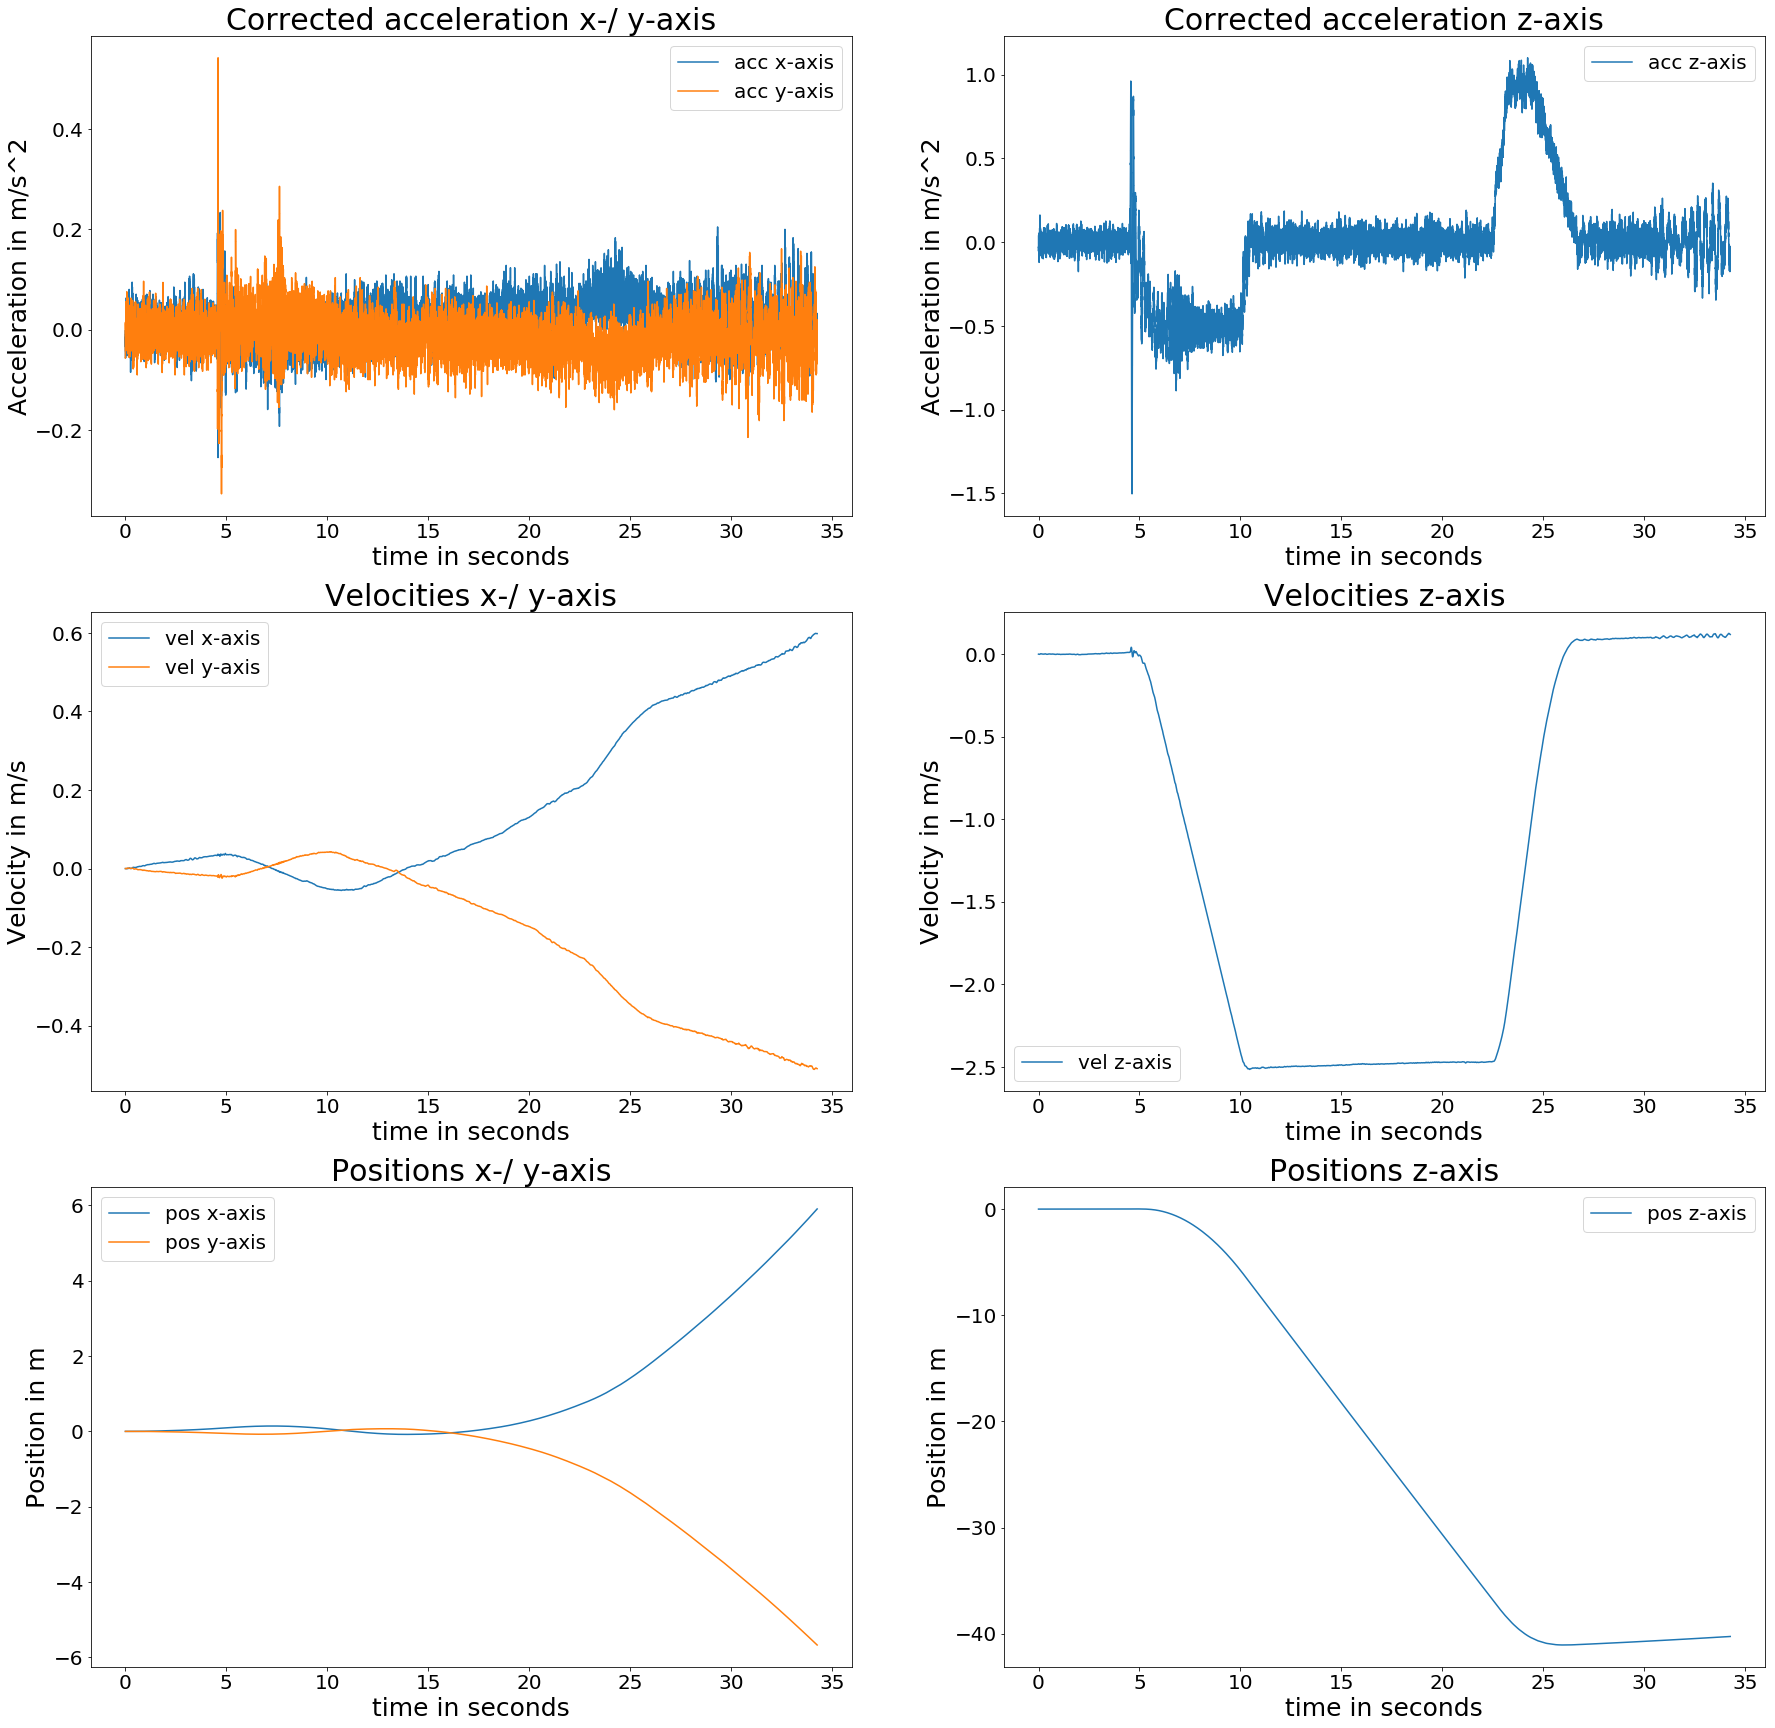

Run 3
(100000,) (100000,)
Min height: -41.636299m


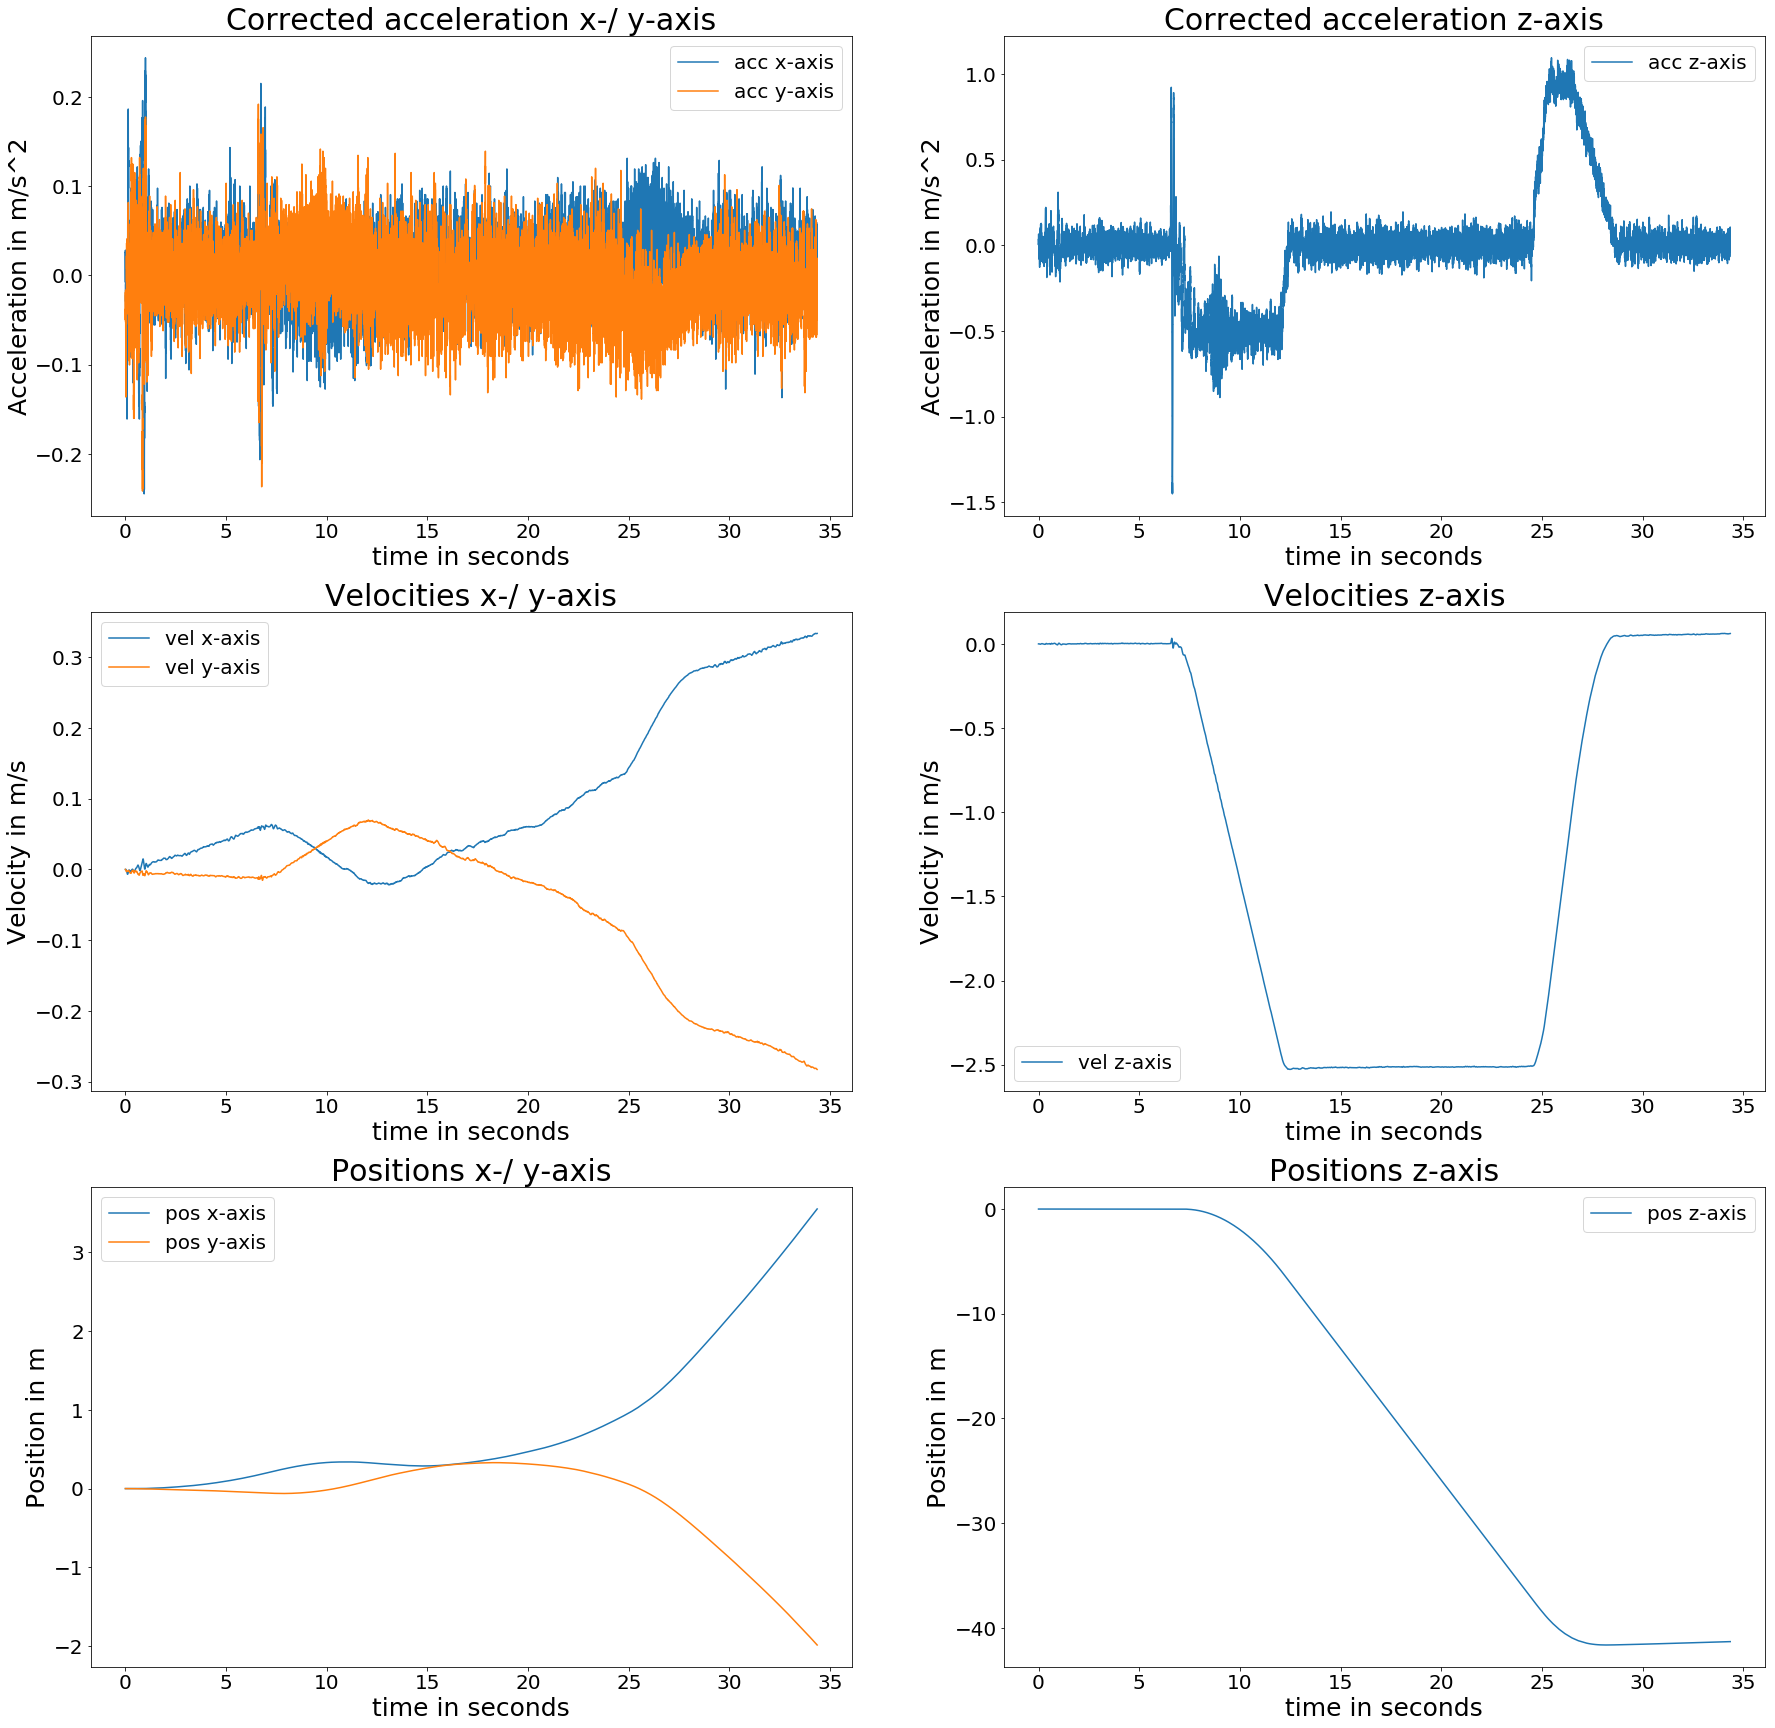

Run 4
(100000,) (100000,)
Min height: -41.900101m


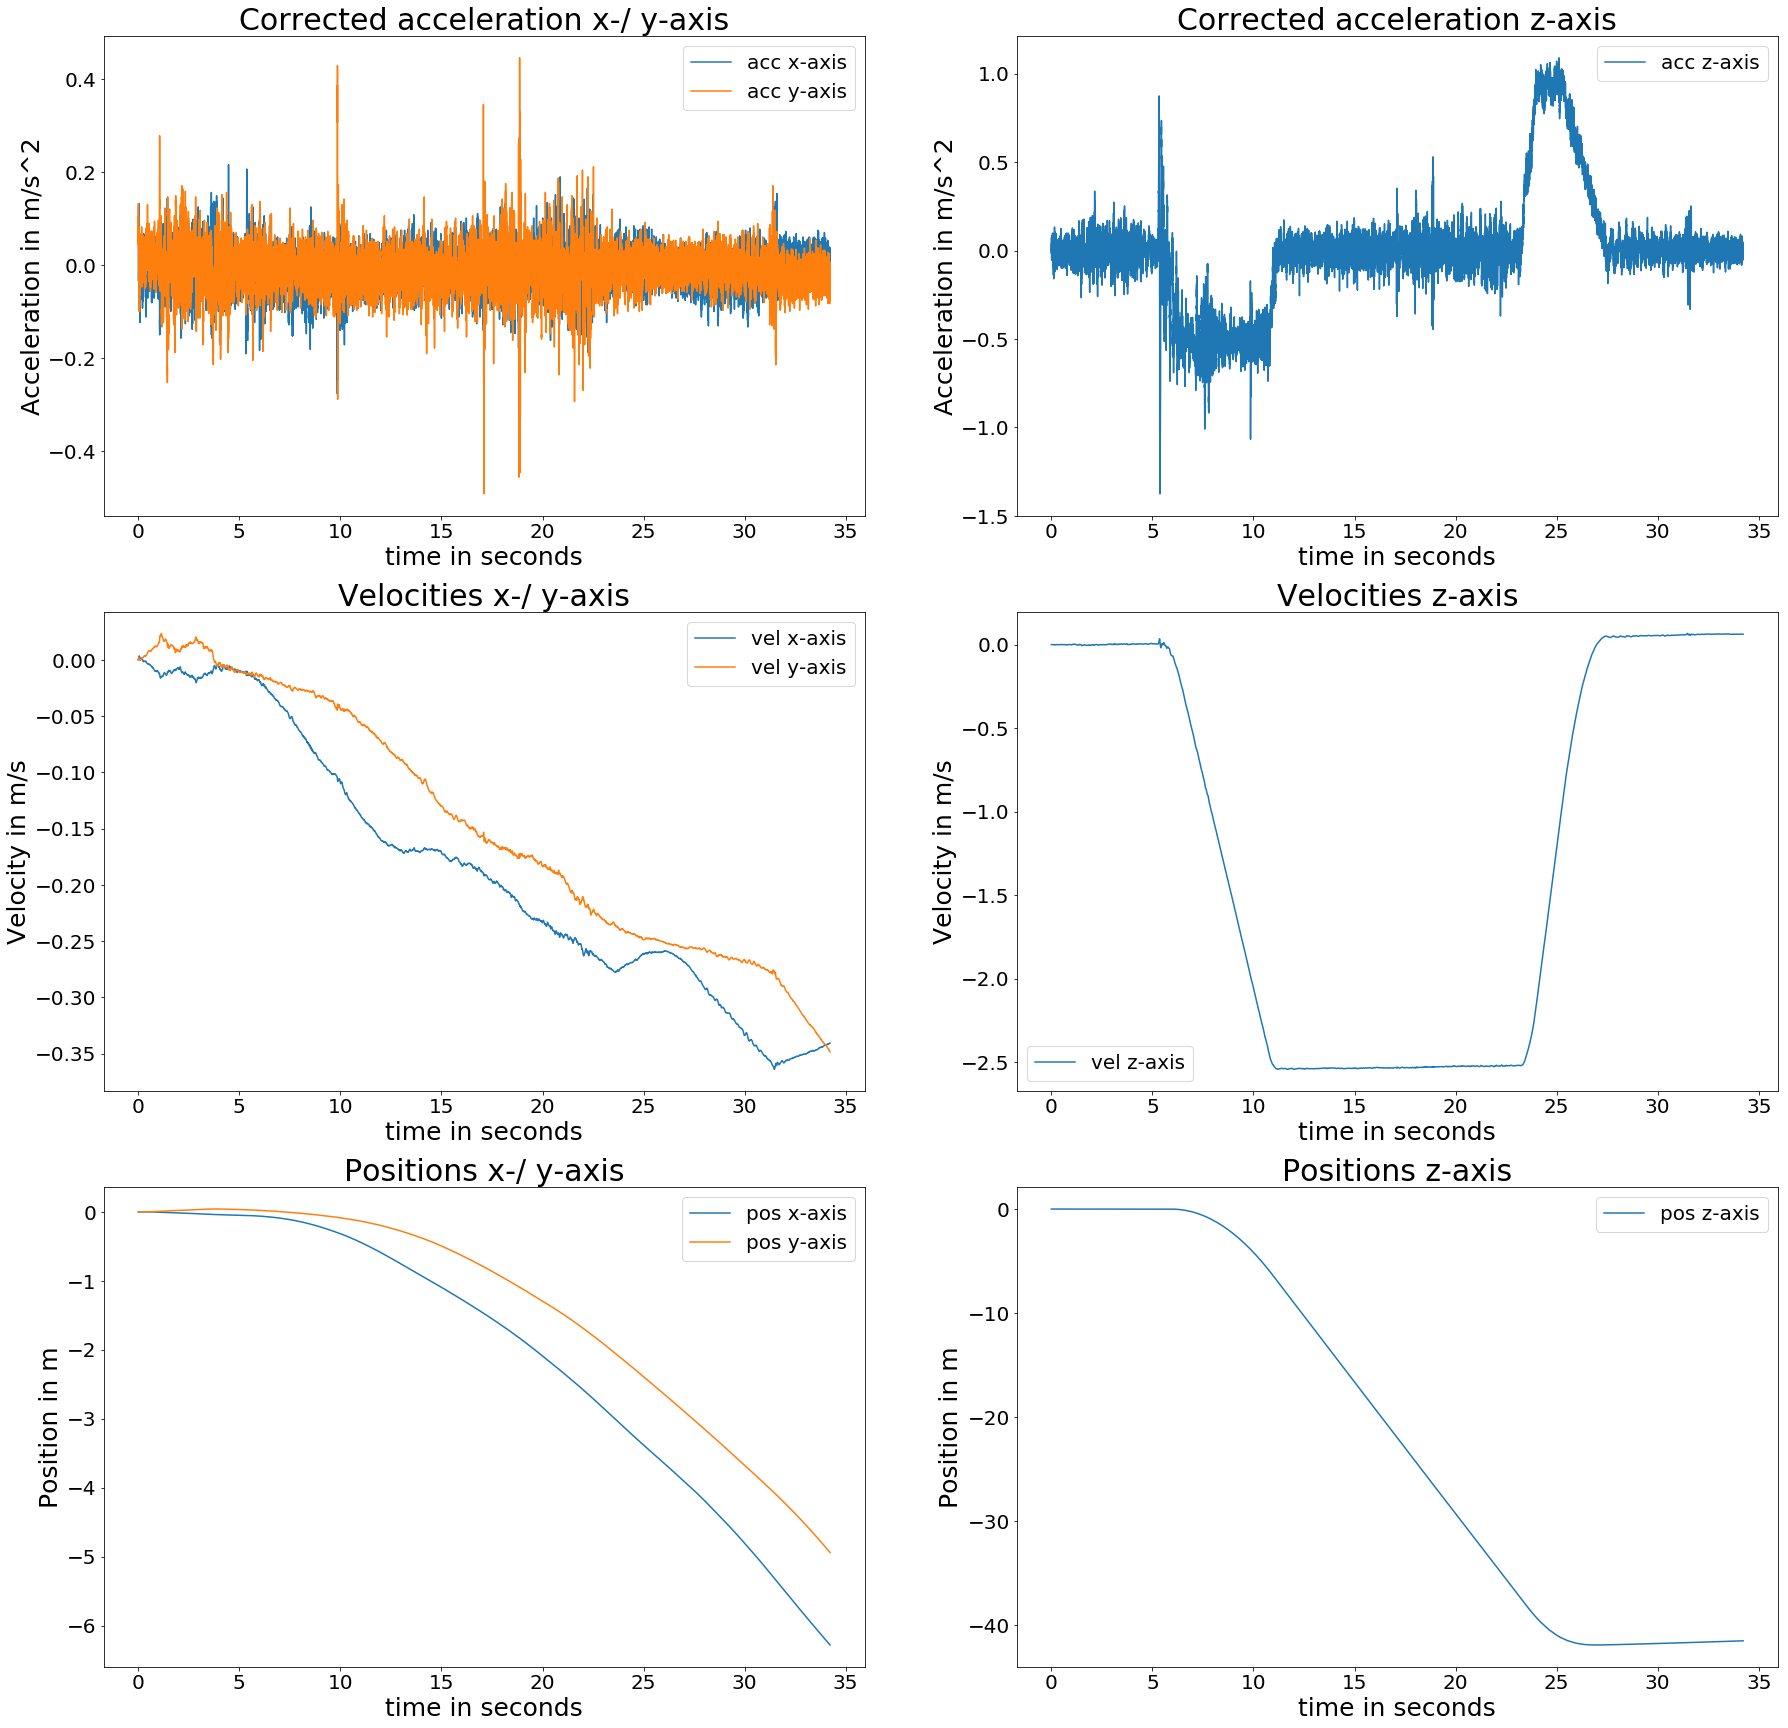

Run 5
(100000,) (100000,)
Min height: -41.077202m


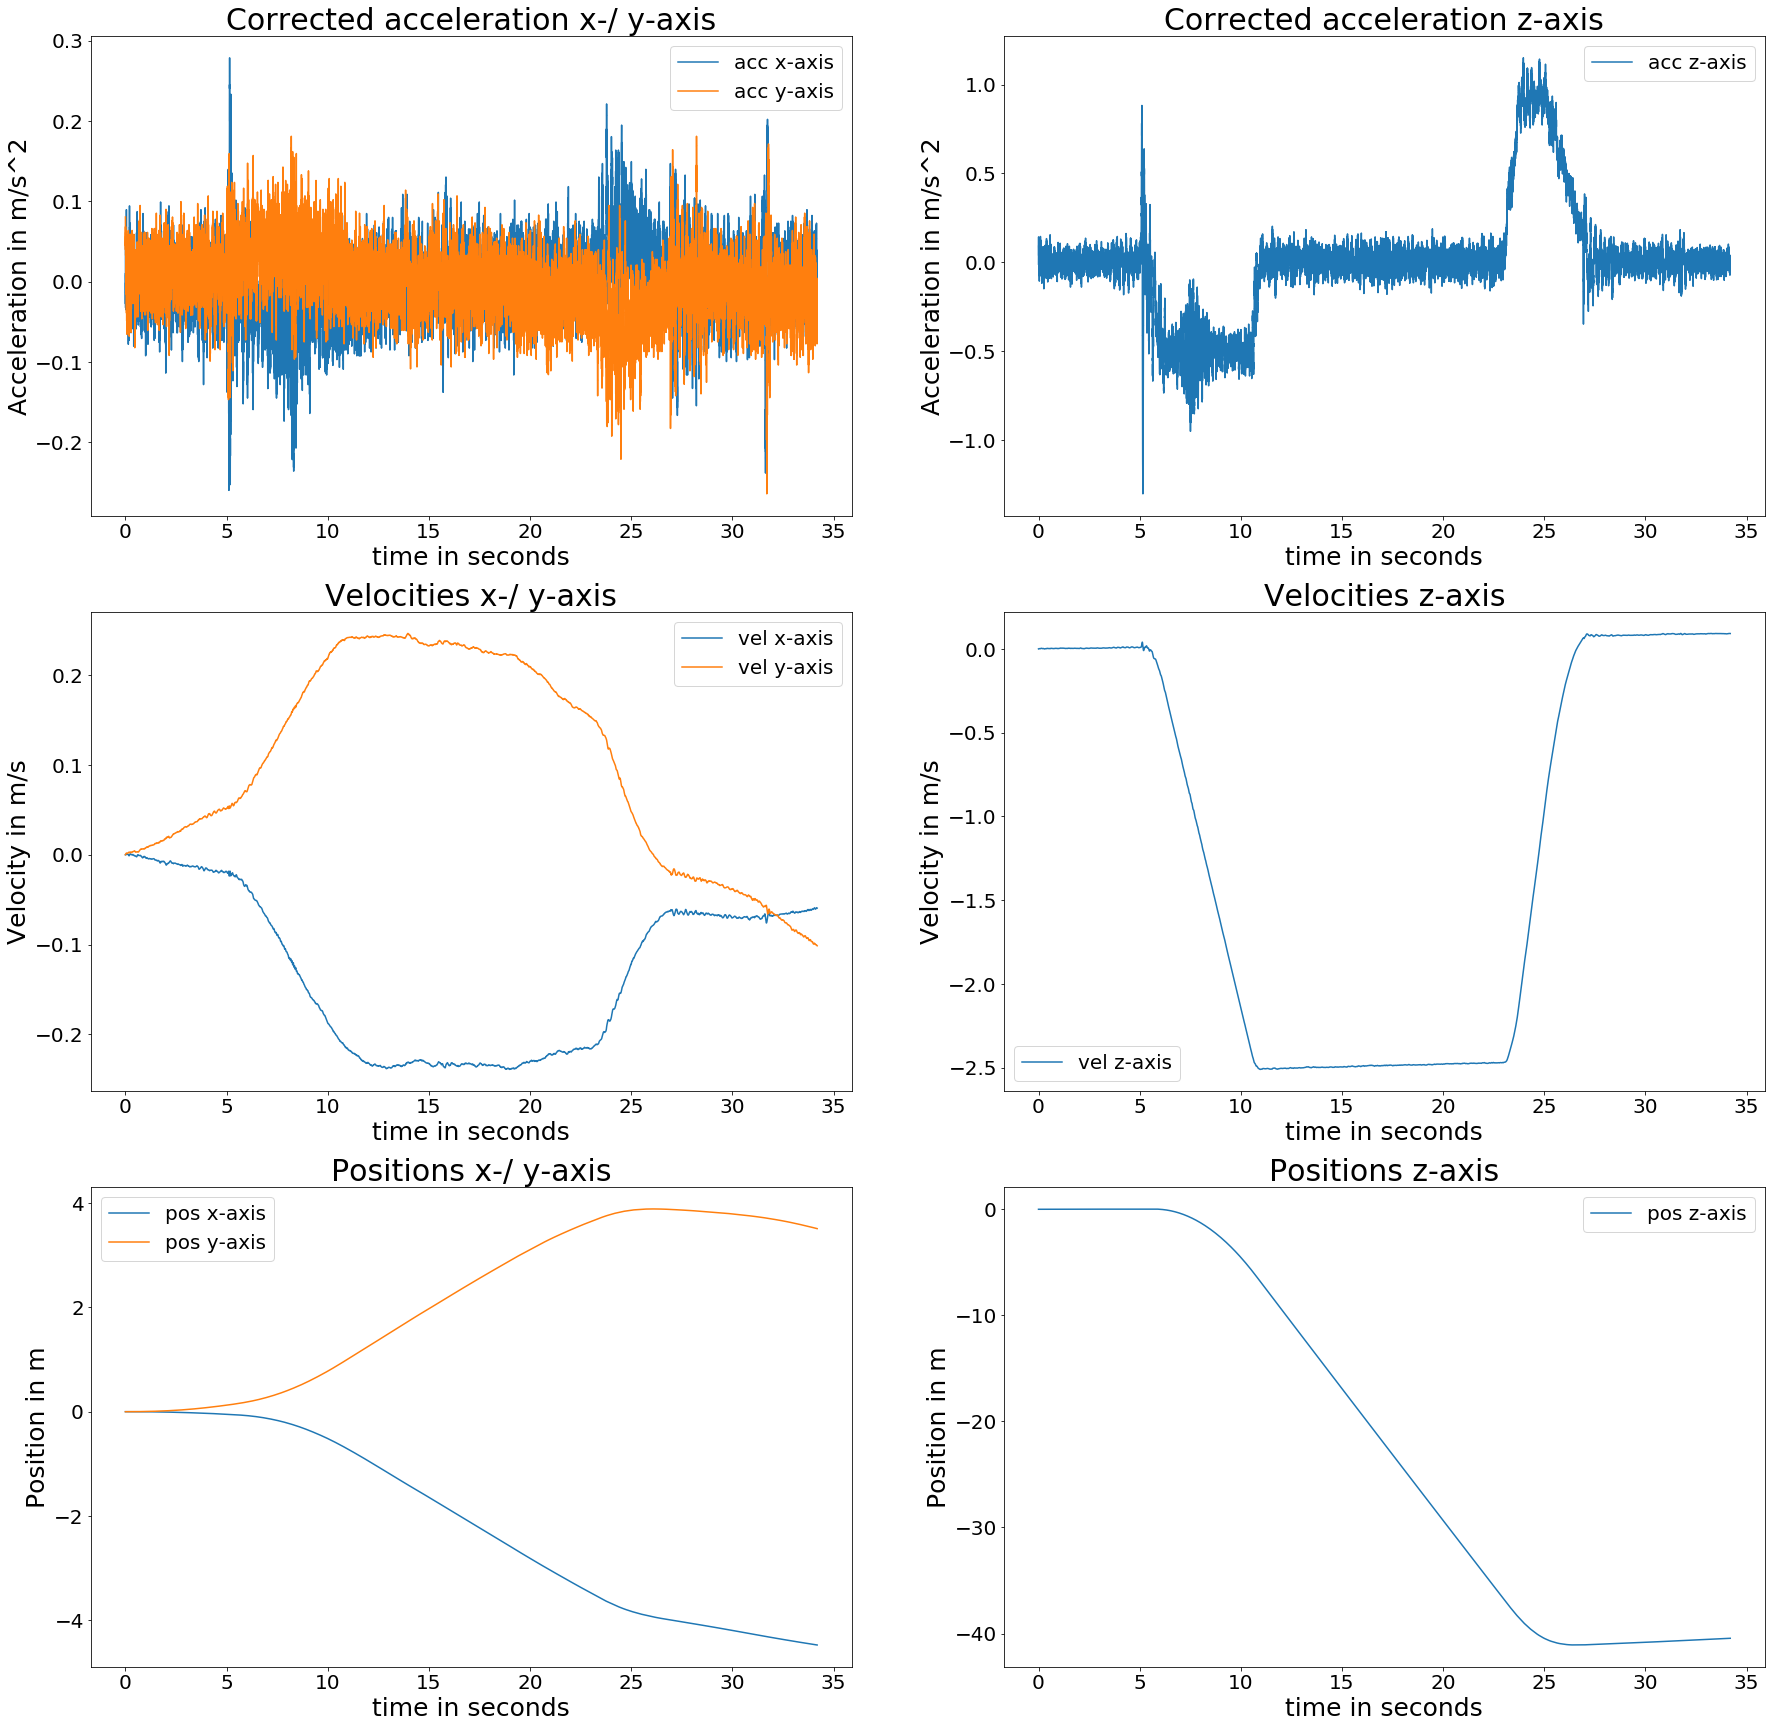

Avg. acceleration deviation: 0.022321 m/s^2
Avg. velocity deviation: 0.379097 m/s
Avg. position deviation: 5.898647 m

Plots 5 runs half up (second run)
Run 1
(100000,) (100000,)
Min height: -0.031086m


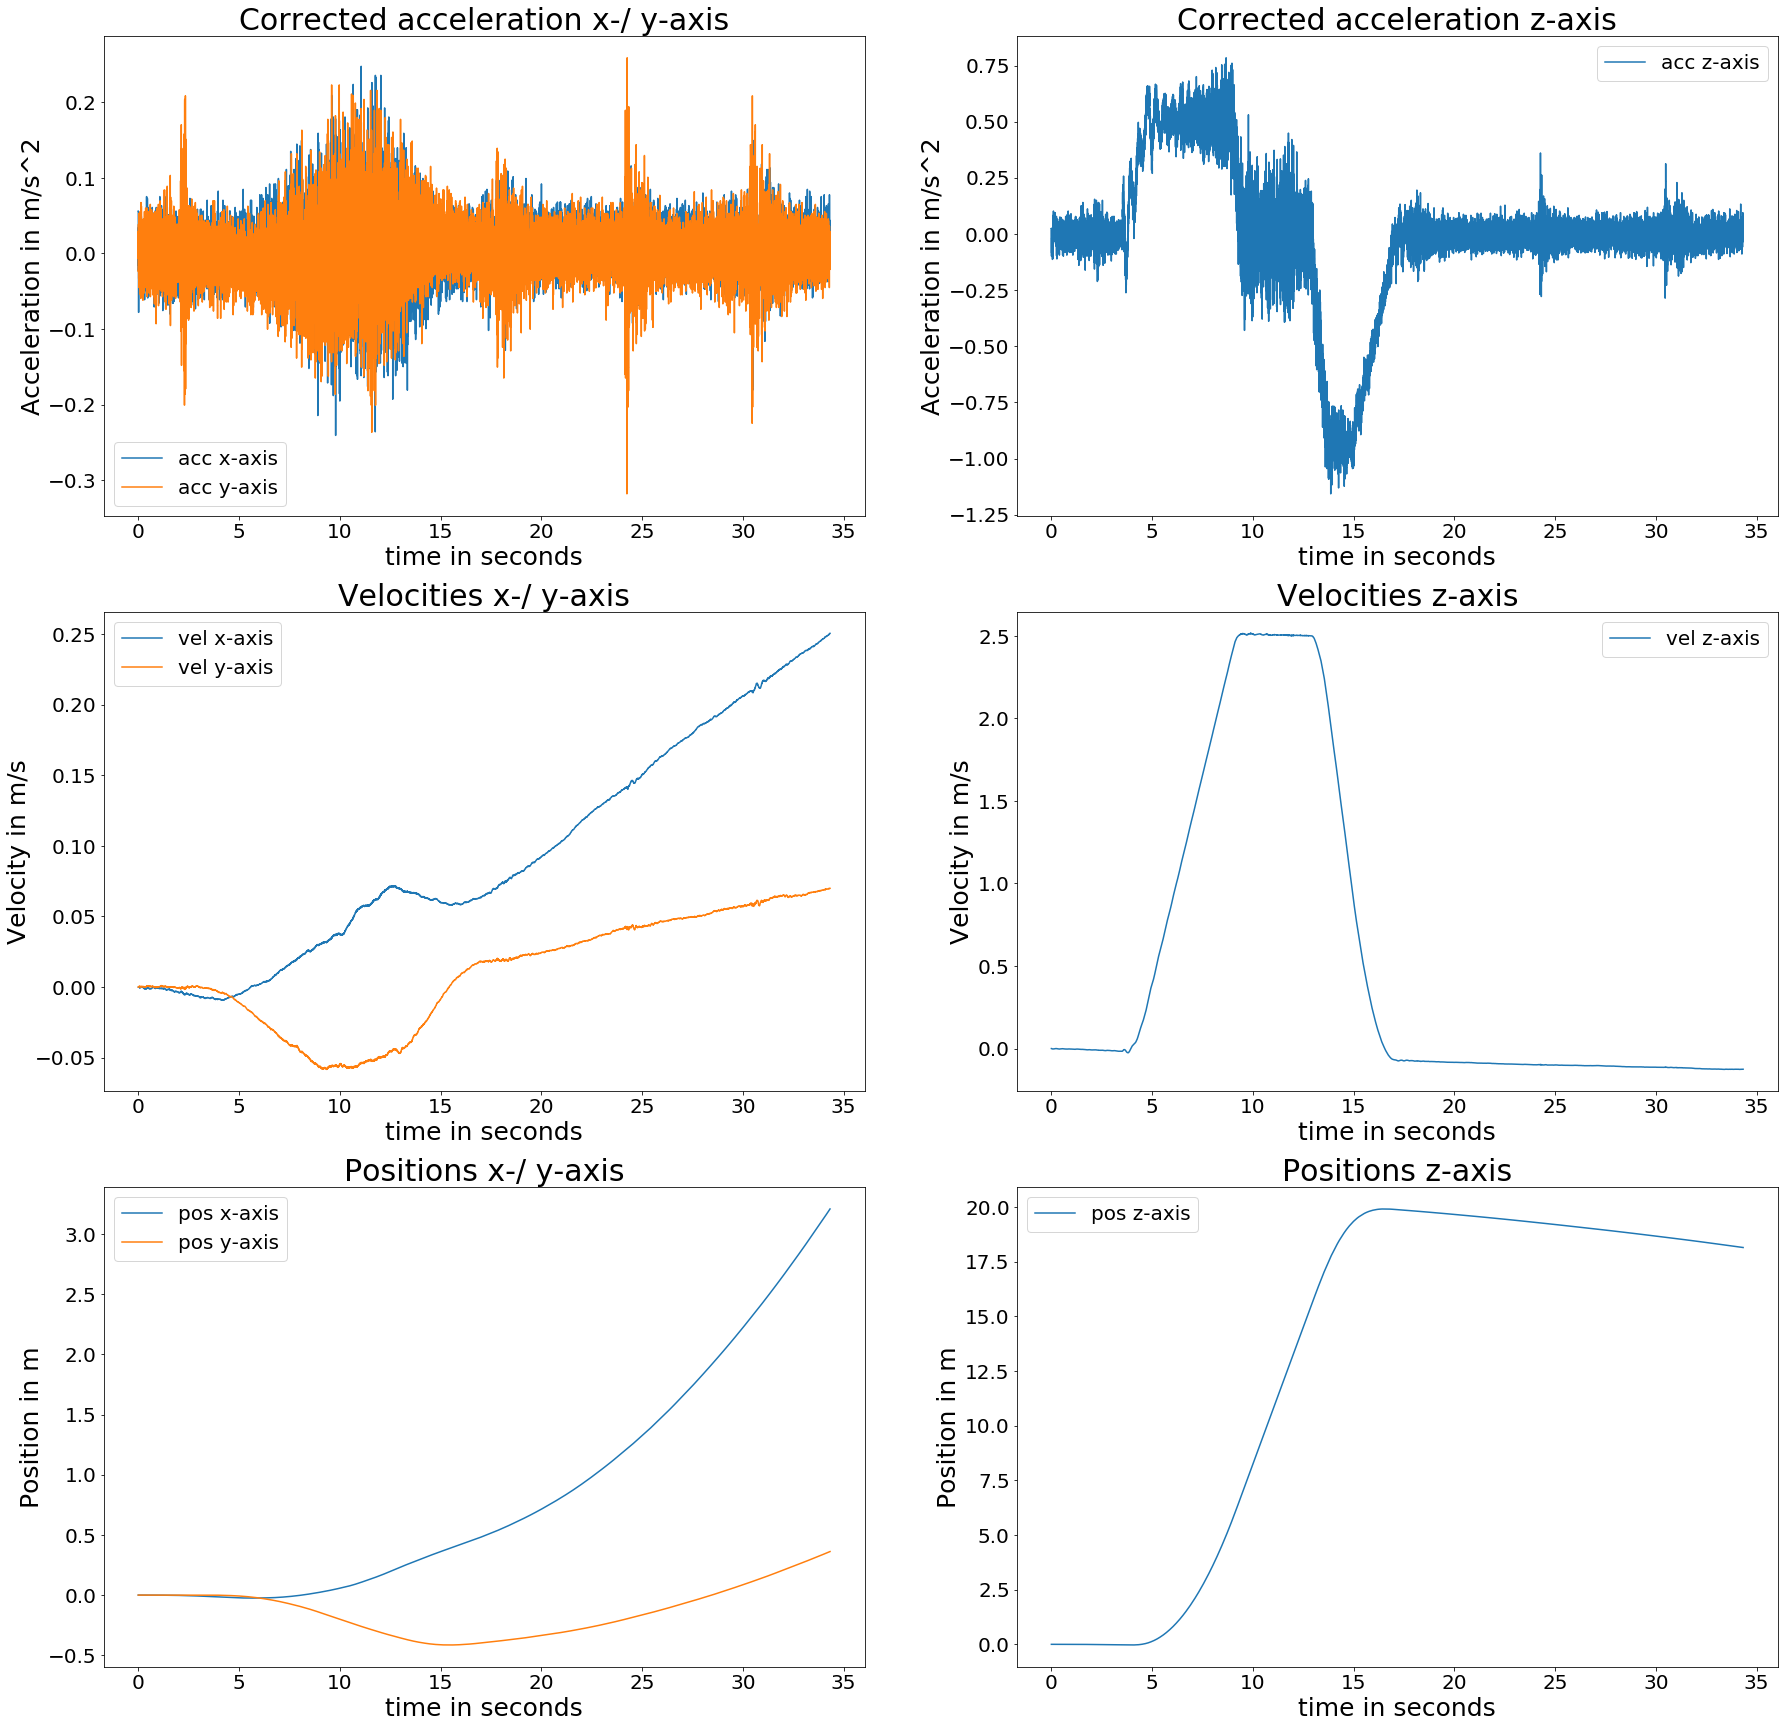

Run 2
(100000,) (100000,)
Min height: -0.000123m


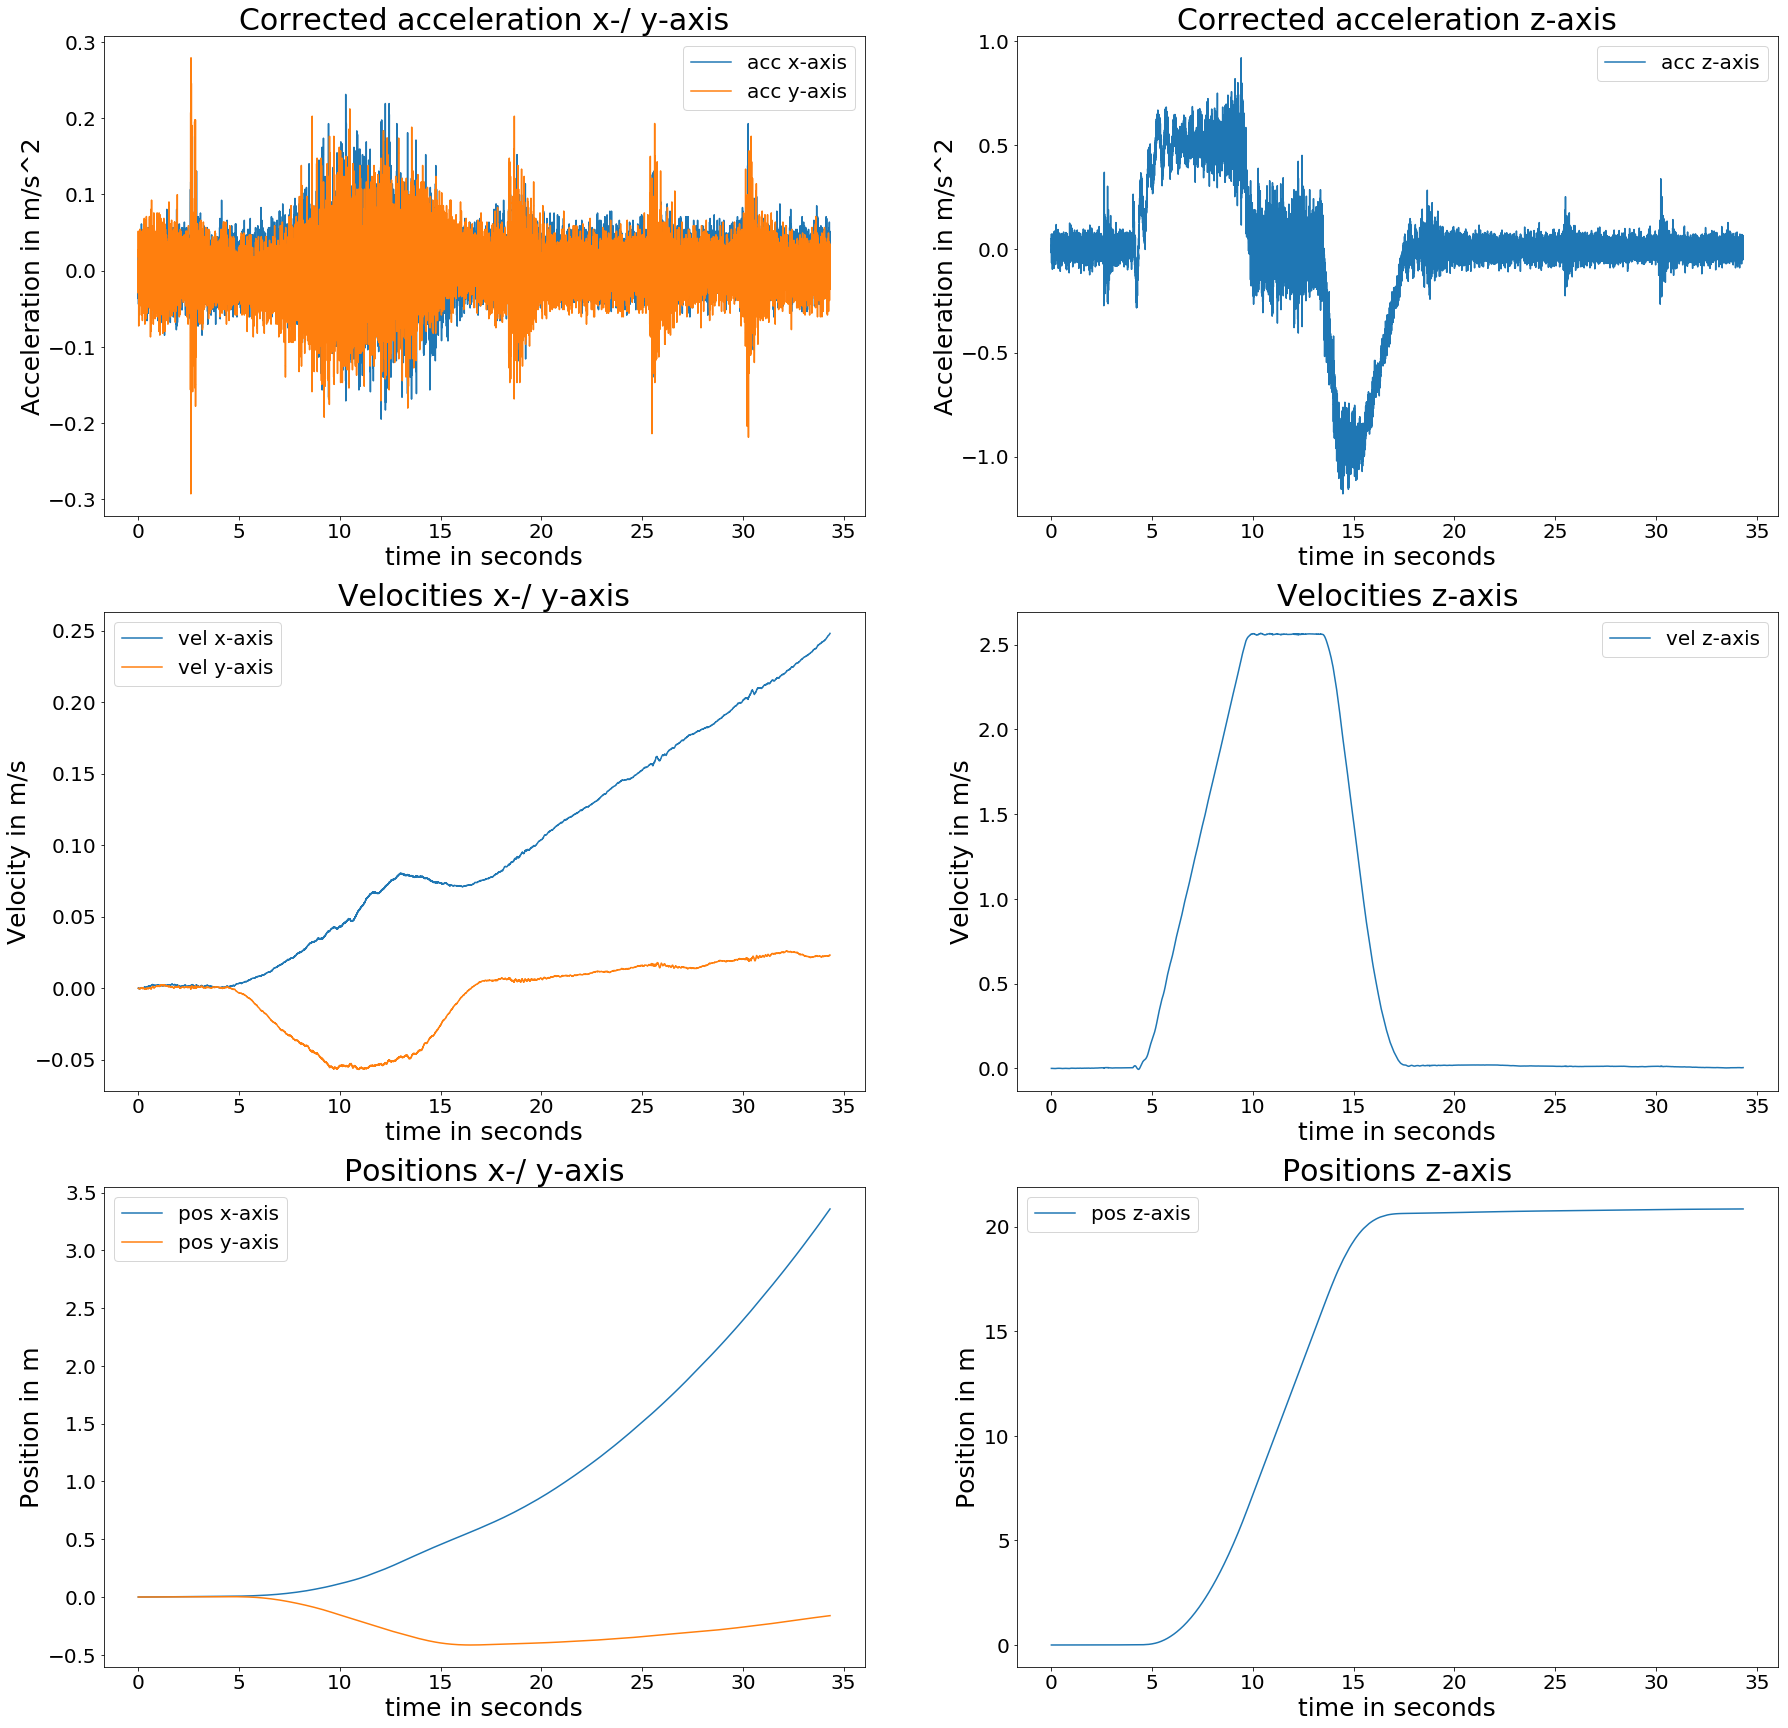

Run 3
(80740,) (80739,)


ValueError: x and y must have same first dimension, but have shapes (80739,) and (80740,)

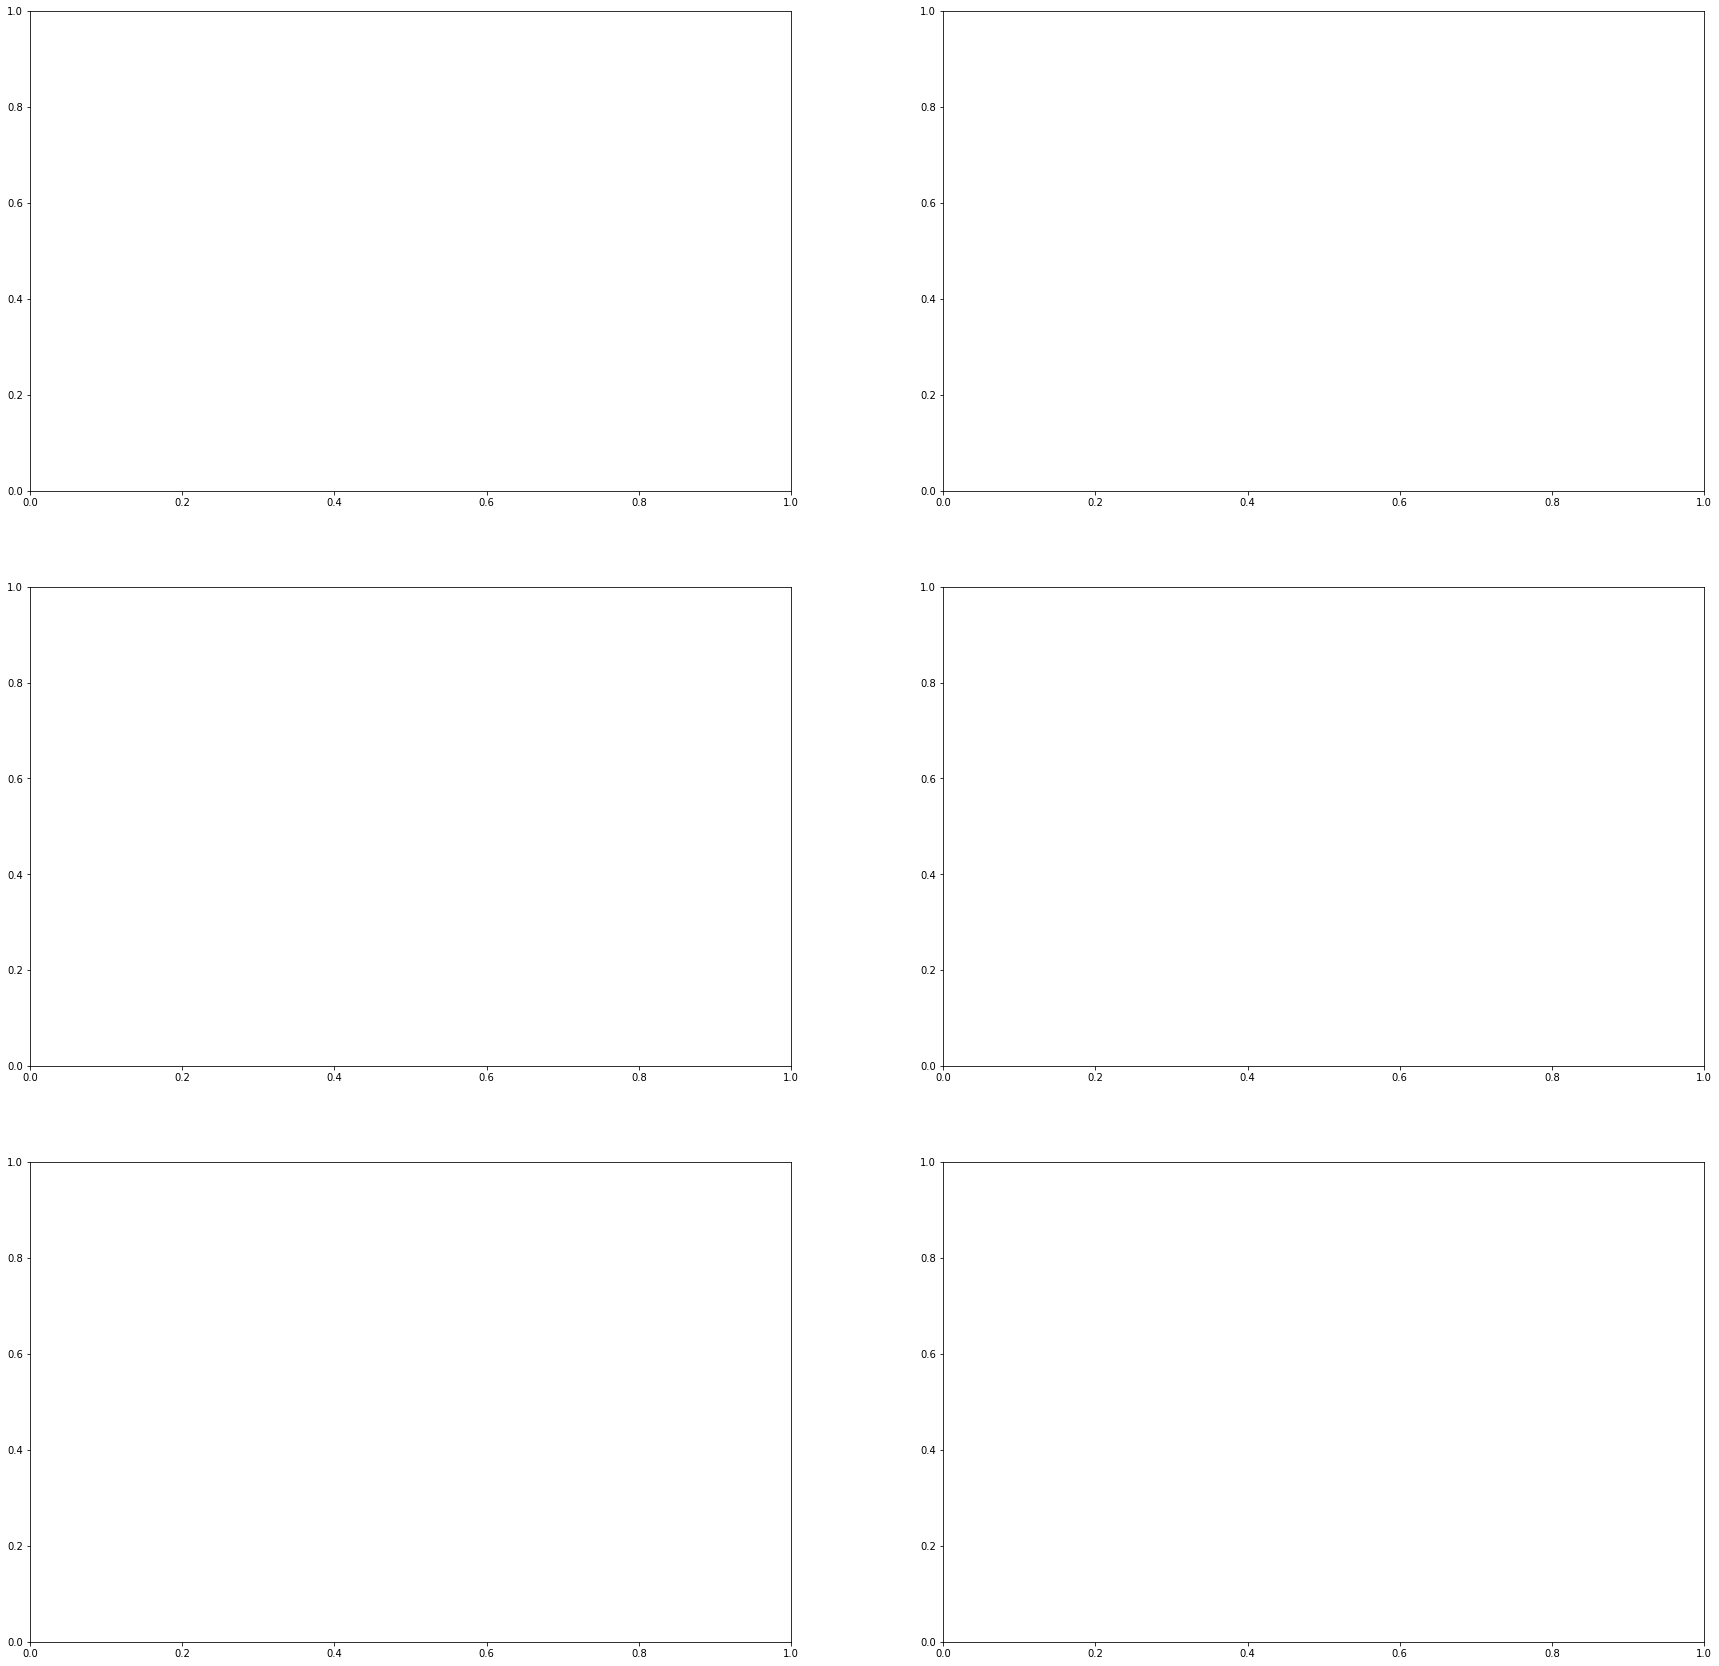

In [7]:
print("Plots 7 runs all up (first run)")
avg_acc = 0.0
avg_vel = 0.0
avg_pos = 0.0
for run in range(7):
    print("Run %d" % (run + 1))
    run_dict = imu_data_first[run]
    avg_a, avg_v, avg_p = plot_run_data(run_dict, True)
    avg_acc += avg_a
    avg_vel += avg_v
    avg_pos += avg_p
avg_acc = avg_acc/7
print("Avg. acceleration deviation: %f m/s^2" % avg_acc)
avg_vel = avg_vel/7
print("Avg. velocity deviation: %f m/s" % avg_vel)
avg_pos = avg_pos/7
print("Avg. position deviation: %f m" % avg_pos)

# elevator data 2 (going up and down/ half and all the way)

print()
print("Plots 5 runs all up (second run)")
avg_acc = 0.0
avg_vel = 0.0
avg_pos = 0.0
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data_all_up[run]
    max_a_d, avg_v, avg_p = plot_run_data(run_dict, False)
    avg_acc += avg_a
    avg_vel += avg_v
    avg_pos += avg_p
avg_acc = avg_acc/5
print("Avg. acceleration deviation: %f m/s^2" % avg_acc)
avg_vel = avg_vel/5
print("Avg. velocity deviation: %f m/s" % avg_vel)
avg_pos = avg_pos/5
print("Avg. position deviation: %f m" % avg_pos)
    
print()
print("Plots 5 runs all down (second run)")
avg_acc = 0.0
avg_vel = 0.0
avg_pos = 0.0
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data_all_down[run]
    max_a_d, avg_v, avg_p = plot_run_data(run_dict, False)
    avg_acc += avg_a
    avg_vel += avg_v
    avg_pos += avg_p
avg_acc = avg_acc/5
print("Avg. acceleration deviation: %f m/s^2" % avg_acc)
avg_vel = avg_vel/5
print("Avg. velocity deviation: %f m/s" % avg_vel)
avg_pos = avg_pos/5
print("Avg. position deviation: %f m" % avg_pos)
    
print()
print("Plots 5 runs half up (second run)")
avg_acc = 0.0
avg_vel = 0.0
avg_pos = 0.0
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data_half_up[run]
    max_a_d, avg_v, avg_p = plot_run_data(run_dict, False)
    avg_acc += avg_a
    avg_vel += avg_v
    avg_pos += avg_p
avg_acc = avg_acc/5
print("Avg. acceleration deviation: %f m/s^2" % avg_acc)
avg_vel = avg_vel/5
print("Avg. velocity deviation: %f m/s" % avg_vel)
avg_pos = avg_pos/5
print("Avg. position deviation: %f m" % avg_pos)
    
print()
print("Plots 5 runs half down (second run)")
avg_acc = 0.0
avg_vel = 0.0
avg_pos = 0.0
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data_half_down[run]
    max_a_d, avg_v, avg_p = plot_run_data(run_dict, False)
    avg_acc += avg_a
    avg_vel += avg_v
    avg_pos += avg_p
avg_acc = avg_acc/5
print("Avg. acceleration deviation: %f m/s^2" % avg_acc)
avg_vel = avg_vel/5
print("Avg. velocity deviation: %f m/s" % avg_vel)
avg_pos = avg_pos/5
print("Avg. position deviation: %f m" % avg_pos)